# Data Visualizations

In [2]:
# Necessary import:
from  datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.insert(1, "../src")
from custom_plot_settings import custom_plot_settings
# Since the Custom Plot is at another folder, this needs to be located first before importing.

### Loading the CSV File to a dataframe:

In [3]:
df = pd.read_csv("../data/merged/data_merged.csv")
df = df.set_index("Episode #")

In [4]:
df

,Song Questions + Snack Time Game,Air Date,Month,Year,Detailed Result,General Result,Result as Number
Episode #,,,,,,,
1,BTS - DNA,"April 7, 2018",April,2018,2nd Try Success,Success,2
1,Bolbbalgan4 - Fight Day,"April 7, 2018",April,2018,3rd Try Success,Success,3
1,Seventeen - Very Nice,"April 7, 2018",April,2018,3rd Try Success,Success,3
2,Chakra - Hey U,"April 14, 2018",April,2018,3rd Try Success,Success,3
2,Girls' Generation-TTS - Adrenaline,"April 14, 2018",April,2018,2nd Try Success,Success,2
...,...,...,...,...,...,...,...
306,Lee Hyo-ri - Anyclub,"March 16, 2024",March,2024,2nd Try Success,Success,2
307,ZE:A - Variety of Ways,"March 23, 2024",March,2024,1st Try Success,Success,1
307,Cherry Filter - Supermarket,"March 23, 2024",March,2024,2nd Try Success,Success,2


### Declaring a function that gets the current time when called and output as a formatted string. To be used in naming the plots so that names are unique:

In [5]:
def datetime_formatter() -> str:
    """A function used for naming output files.

    Returns:
        str: Returns the current time in String format already:\n\t\t"%H%M%S"
    """
    current_datetime = datetime.now()
    formatted_datetime = current_datetime.strftime("%H%M%S")
    
    return formatted_datetime

### Function that plots data of all Months per Year. To visualize how the the whole team performs as time goes by:

In [6]:
def plot_months_per_year(dataframe: pd.DataFrame) -> None:
    """Accepts a pandas dataframe and make plots of the months per year.

    Args:
        dataframe (pd.DataFrame): Data feed here must be the cleaned and merged data.
    """
    
    # Current datetime to be used for naming the saved plots.
    current_datetime = datetime_formatter()
    year_list = list(dataframe["Year"].unique())
    
    for per_year in year_list:
        # > Current datetime to be used for naming the saved plots.
        current_datetime = datetime_formatter()
        # Filtered dataframe base on the current year in the list.
        df_year = dataframe[dataframe["Year"] == per_year].copy()
        # A dataframe that will be use to handle the data of the inner for loop
        handler = pd.DataFrame()
        
        month_list = list(df_year["Month"].unique())
        # Just some rcParams setting to make the text bigger or smaller depending on how many months there is available.
        if len(month_list) > 6:
            mpl.rcParams["font.size"] = 14
        else:
            mpl.rcParams["font.size"] = 18
        # ----------------------------------------------------------------------------------------------------
        # This inner for loop is used to make the grouping of months in the filtered dataframe in order.
        # By default, if you used "groupby" to the whole dataframe, it will jumble the order of the months. 
        # This for loop ensures that the order the months is still in order while grouping it.
        # ----------------------------------------------------------------------------------------------------
        for per_month in month_list:
            df_months_inorder = df_year[df_year["Month"] == per_month]
            
            per_month_result = df_months_inorder.groupby(["Month", "Detailed Result"]).size().unstack()
            
            handler = pd.concat([handler, per_month_result], axis=0)
        # ----------------------------------------------------------------------------------------------------
        # > Applying the custom colors same as the one in the wikipedia page of the Show. The function also
        # applies the rcParams for general settings.
        # > Reording the columns of the filtered -> grouped dataframe.
        # > Filling the NaN with "0" so that I could convert the Dtype to "int". This will prevent the values
        # to have decimals.
        # ----------------------------------------------------------------------------------------------------
        result_names = ["1st Try Success", "2nd Try Success", "3rd Try Success", "Failed"]
        current_result_names = [] # Holds the Results in proper order already.
        handler_columns = list(handler.columns)

        for result_name in result_names:
            if result_name in handler_columns:
                current_result_names.append(result_name)
        
        custom_colors = custom_plot_settings(current_result_names)
        
        df_results_per_month = handler[current_result_names].copy()
        df_results_per_month.fillna(0, inplace=True)
        df_results_per_month[current_result_names] = df_results_per_month[current_result_names].astype("int")
        # ----------------------------------------------------------------------------------------------------
        # Data plotting and settings.
        # ----------------------------------------------------------------------------------------------------
        ax = df_results_per_month.plot(kind="bar", stacked=True, colormap=custom_colors, rot=45)
        ax.grid(axis="y")
        plt.xlabel("Month", fontsize=18)
        plt.ylabel("Number of Occurrences", fontsize=18)
        plt.title(f"Consolidated results per Month\n(Year: {per_year})", fontsize=25)
        plt.legend(title="Result:", fontsize=12, bbox_to_anchor=(1, 1))
        # ----------------------------------------------------------------------------------------------------
        # This for loop gets the Results for each month, checks the value if its greater than 0. If it is, 
        # then it will be placed to the bar - centered. If its 0 or lower, then it will be just an empty string.
        # ----------------------------------------------------------------------------------------------------
        for c in ax.containers:
            labels = [int(v.get_height()) if v.get_height() > 0 else "" for v in c]
            
            ax.bar_label(c, labels=labels, label_type="center") # type: ignore
        # ----------------------------------------------------------------------------------------------------
        # Saves and show the plots.
        # ----------------------------------------------------------------------------------------------------
        plt.savefig(f"../figures/Plot-Months-{per_year}.{current_datetime}.jpg",
                    dpi=300,
                    bbox_inches ="tight",
                    pad_inches=0.5)
        plt.show()

### Function that plots data of all Years per Month. To visualize the performance of the whole team every month in different years:

In [7]:
def plot_years_per_month(dataframe: pd.DataFrame) -> None:
    """Accepts a pandas dataframe and make plots of the years per month.

    Args:
        dataframe (pd.DataFrame): Data feed here must be the cleaned and merged data.
    """
    
    # ----------------------------------------------------------------------------------------------------
    # > Applying the custom colors same as the one in the wikipedia page of the Show. The function also
    # applies the rcParams for general settings.
    # > Getting the unique "Month" values (No repetition) to be loop and used as a filtering method to the 
    # dataframe.
    # ----------------------------------------------------------------------------------------------------
    # custom_colors = custom_plot_settings()
    month_list = ["January", "February", "March", "April", "May", "June", "July",
                "August", "September", "October", "November", "December"]

    for per_month in month_list:
        # > Current datetime to be used for naming the saved plots.
        current_datetime = datetime_formatter()
        # Filtered dataframe base on the current month in the list.
        df_current_month = dataframe[dataframe["Month"] == per_month]
        # A dataframe that will be use to handle the data of the inner for loop
        handler = pd.DataFrame()
        
        year_list = list(df_current_month["Year"].unique())
        # ----------------------------------------------------------------------------------------------------
        # This inner for loop is used to make the grouping of years in the filtered dataframe in order.
        # By default, if you used "groupby" to the whole dataframe, it will jumble the order of the years. 
        # This for loop ensures that the order the years is still in order while grouping it.
        # ----------------------------------------------------------------------------------------------------
        for per_year in year_list:
            df_year_inorder = df_current_month[df_current_month["Year"] == per_year]
            
            per_year_result = df_year_inorder.groupby(["Year", "Detailed Result"]).size().unstack()
            
            handler = pd.concat([handler, per_year_result], axis=0)
        # ----------------------------------------------------------------------------------------------------
        # Since not all months have all of the columns / results, this ensures that it only includes the \
        # columns available to the current iterated month.
        # ----------------------------------------------------------------------------------------------------
        result_names = ["1st Try Success", "2nd Try Success", "3rd Try Success", "Failed"]
        current_result_names = [] # Holds the Results in proper order already.
        handler_columns = list(handler.columns)

        for result_name in result_names:
            if result_name in handler_columns:
                current_result_names.append(result_name)
        
        custom_colors = custom_plot_settings(current_result_names)
        # ----------------------------------------------------------------------------------------------------
        # > Reording the columns of the filtered -> grouped dataframe.
        # > Filling the NaN with "0" so that I could convert the Dtype to "int". This will prevent the values
        # to have decimals.
        # ----------------------------------------------------------------------------------------------------
        df_results_per_year = handler[current_result_names].copy()
        df_results_per_year.fillna(0, inplace=True)
        df_results_per_year[current_result_names] = df_results_per_year[current_result_names].astype("int")
        # ----------------------------------------------------------------------------------------------------
        # Data plotting and settings.
        # ----------------------------------------------------------------------------------------------------
        ax = df_results_per_year.plot(kind="bar", stacked=True, colormap=custom_colors, rot=45)
        ax.grid(axis="y")
        plt.xlabel("Year", fontsize=18)
        plt.ylabel("Number of Occurrences", fontsize=18)
        plt.title(f"Consolidated results per Year\n(Month: {per_month})", fontsize=25)
        plt.legend(title="Result:", fontsize=12, bbox_to_anchor=(1, 1))
        # ----------------------------------------------------------------------------------------------------
        # This for loop gets the Results for each month, checks the value if its greater than 0. If it is, 
        # then it will be placed to the bar - centered. If its 0 or lower, then it will be just an empty string.
        # ----------------------------------------------------------------------------------------------------
        for c in ax.containers:
            labels = [int(v.get_height()) if v.get_height() > 0 else "" for v in c]
            
            ax.bar_label(c, labels=labels, label_type="center") # type: ignore
        # ----------------------------------------------------------------------------------------------------
        # Saves and show the plots.
        # ----------------------------------------------------------------------------------------------------
        plt.savefig(f"../figures/Plot-Years-{per_month}.{current_datetime}.jpg",
                    dpi=300,
                    bbox_inches ="tight",
                    pad_inches=0.5)
        plt.show()

### Final function. This is almost identical to the first function. The only difference is that this function sums the data to a year that has all 12 months since not all Years has 12 months of data in it (Example: 2018 starts at April. While 2024 only has up to March only.). Then those data of per year gets plot to visualize the total Results per year:

In [8]:
def plot_comparison_per_consolidated_year(dataframe: pd.DataFrame) -> None:
    """Accepts a pandas dataframe and make plots of the years.

    Args:
        dataframe (pd.DataFrame): Data feed here must be the cleaned and merged data.
    """
    
    # Current datetime to be used for naming the saved plots.
    current_datetime = datetime_formatter()
    # ----------------------------------------------------------------------------------------------------
    # This part of the code checks if the current iteration of the year has 12 months of data in it. If it
    # has, then it will be concatenated to the df_year which holds all the years with only 12 months in it.
    # ----------------------------------------------------------------------------------------------------
    year_list = list(dataframe["Year"].unique())
    df_year = pd.DataFrame()

    for year in year_list:
        df_current_year = dataframe[dataframe["Year"] == year]
        
        month_list = list(df_current_year["Month"].unique())
        
        if len(month_list) == 12:
            df_year = pd.concat([df_year, df_current_year], axis=0)
    # ----------------------------------------------------------------------------------------------------
    # This inner for loop is used to make the grouping of months in the filtered dataframe in order.
    # By default, if you used "groupby" to the whole dataframe, it will jumble the order of the months. 
    # This for loop ensures that the order the months is still in order while grouping it.
    # ----------------------------------------------------------------------------------------------------
    handler = pd.DataFrame()
    filtered_year_list = list(df_year["Year"].unique())

    for year in filtered_year_list:
        df_year_inorder = df_year[df_year["Year"] == year]
        
        per_year_result = df_year_inorder.groupby(["Year", "Detailed Result"]).size().unstack()
        
        handler = pd.concat([handler, per_year_result], axis=0)
    # ----------------------------------------------------------------------------------------------------
    # > Applying the custom colors same as the one in the wikipedia page of the Show. The function also
    # applies the rcParams for general settings.
    # > Reording the columns of the filtered -> grouped dataframe.
    # > Filling the NaN with "0" so that I could convert the Dtype to "int". This will prevent the values
    # to have decimals.
    # ----------------------------------------------------------------------------------------------------
    result_names = ["1st Try Success", "2nd Try Success", "3rd Try Success", "Failed"]
    current_result_names = [] # Holds the Results in proper order already.
    handler_columns = list(handler.columns)

    for result_name in result_names:
        if result_name in handler_columns:
            current_result_names.append(result_name)
    
    custom_colors = custom_plot_settings(current_result_names)
    
    df_results_per_year = handler[current_result_names].copy()
    df_results_per_year.fillna(0, inplace=True)
    df_results_per_year[current_result_names] = df_results_per_year[current_result_names].astype("int")
    # ----------------------------------------------------------------------------------------------------
    # Data plotting and settings.
    # ----------------------------------------------------------------------------------------------------
    ax = df_results_per_year.plot(kind="bar", stacked=True, colormap=custom_colors, rot=45)
    ax.grid(axis="y")
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("Number of Occurrences", fontsize=18)
    plt.title(f"Consolidated results:\n{filtered_year_list[0]} to {filtered_year_list[-1]}", fontsize=25)
    plt.legend(title="Result:", fontsize=12, bbox_to_anchor=(1, 1))
    # ----------------------------------------------------------------------------------------------------
    # This for loop gets the Results for each year. Will be placed to the bar - centered.
    # ----------------------------------------------------------------------------------------------------
    for c in ax.containers:
        labels = [int(v.get_height()) for v in c]
        
        ax.bar_label(c, labels=labels, label_type="center") # type: ignore
    # ----------------------------------------------------------------------------------------------------
    # Saves and show the plot.
    # ----------------------------------------------------------------------------------------------------
    plt.savefig(f"../figures/Plot-Consolidated-{filtered_year_list[0]}-to-{filtered_year_list[-1]}.{current_datetime}.jpg",
                dpi=300,
                bbox_inches ="tight",
                pad_inches=0.5)
    plt.show()

# Data Plotting using the functions declared above:

### Let's start with the third function which plots the sum Result per each year:

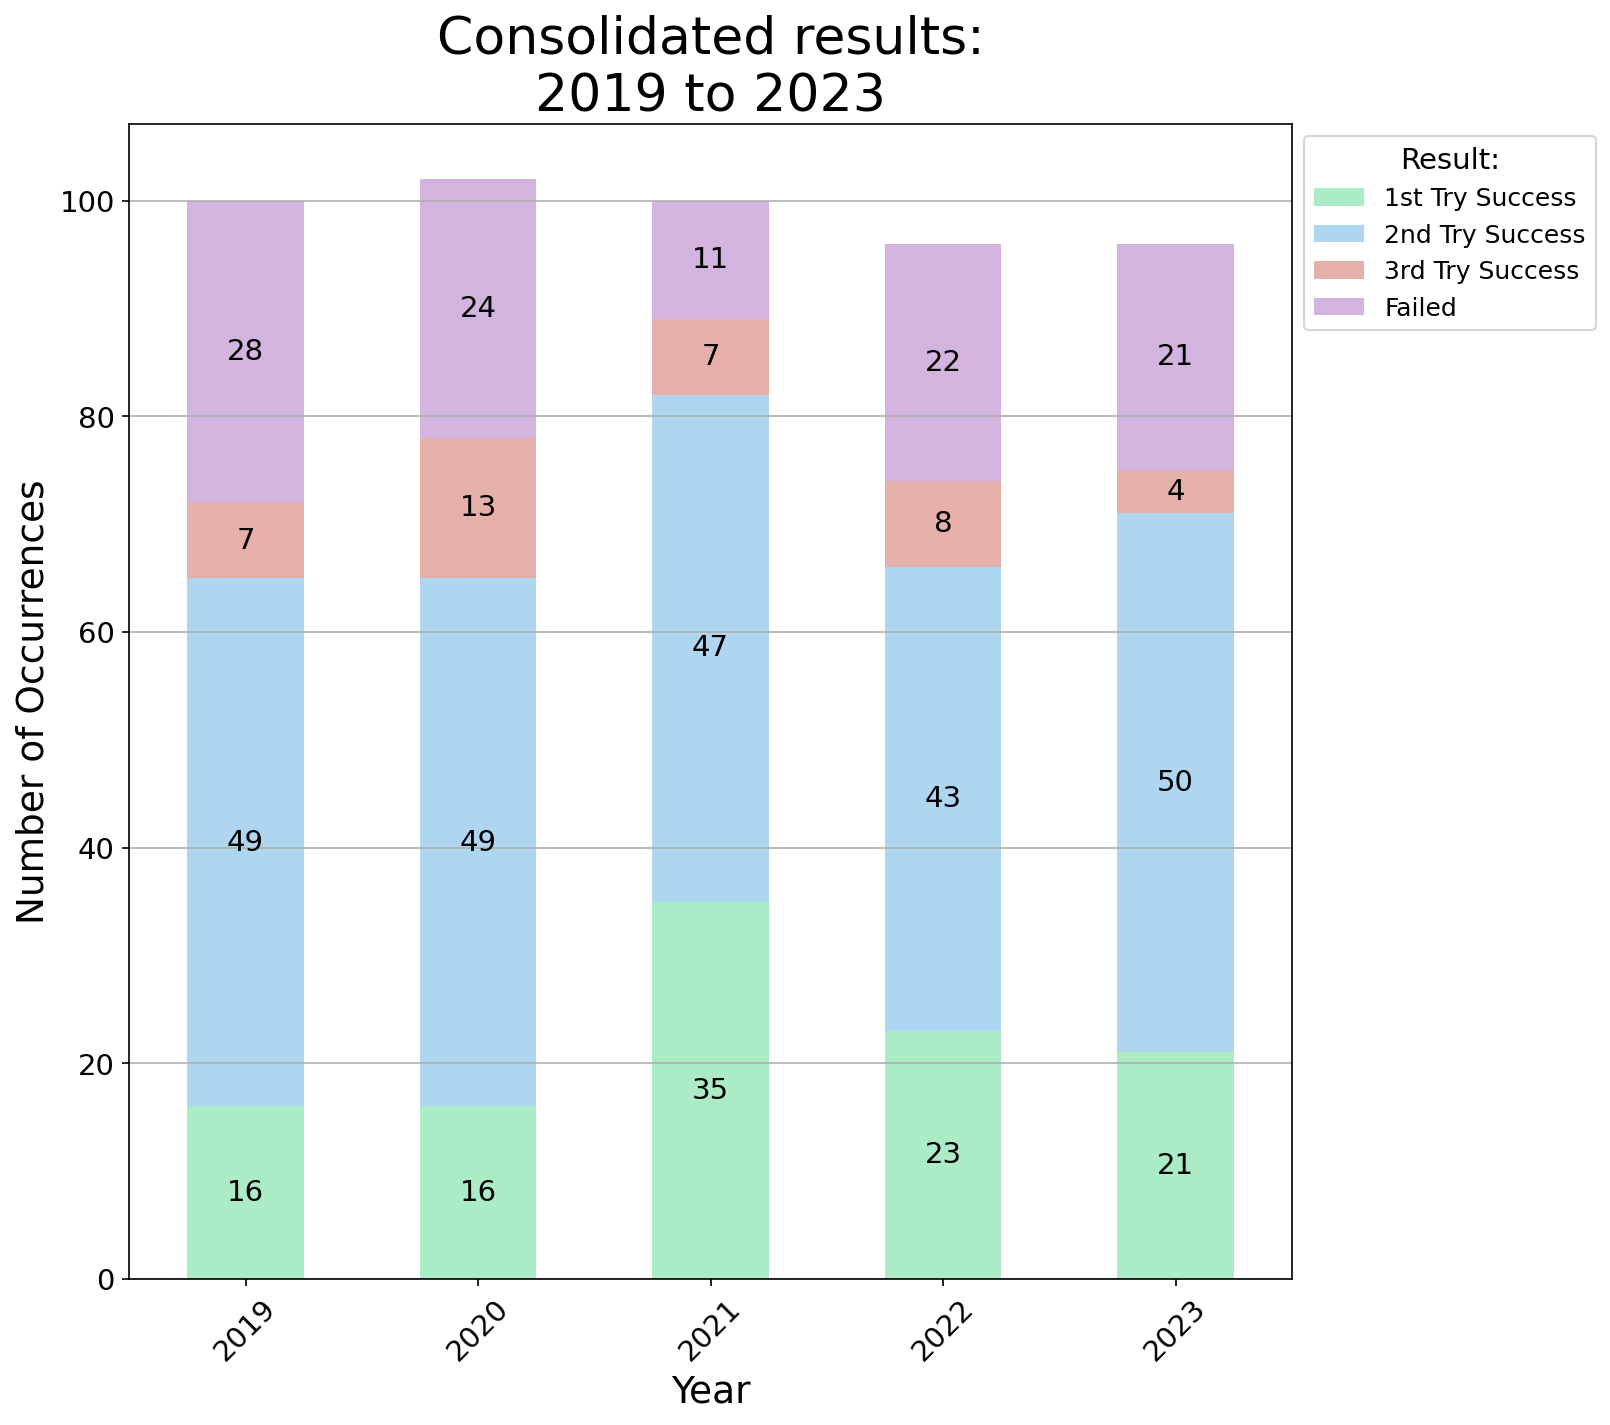

In [10]:
plot_comparison_per_consolidated_year(df)

### From the above plot, we can see that the whole team mostly and more likely to guess the correct lyrics by their second try. Their first try success is also not that bad. As for their third try and failing, we can say that they are more likely to fail if they are already in their third try than actually successfully guessing the lyrics.
### Now let's use the first function and see their performance as time progress and whether my statement from above can still be said true:

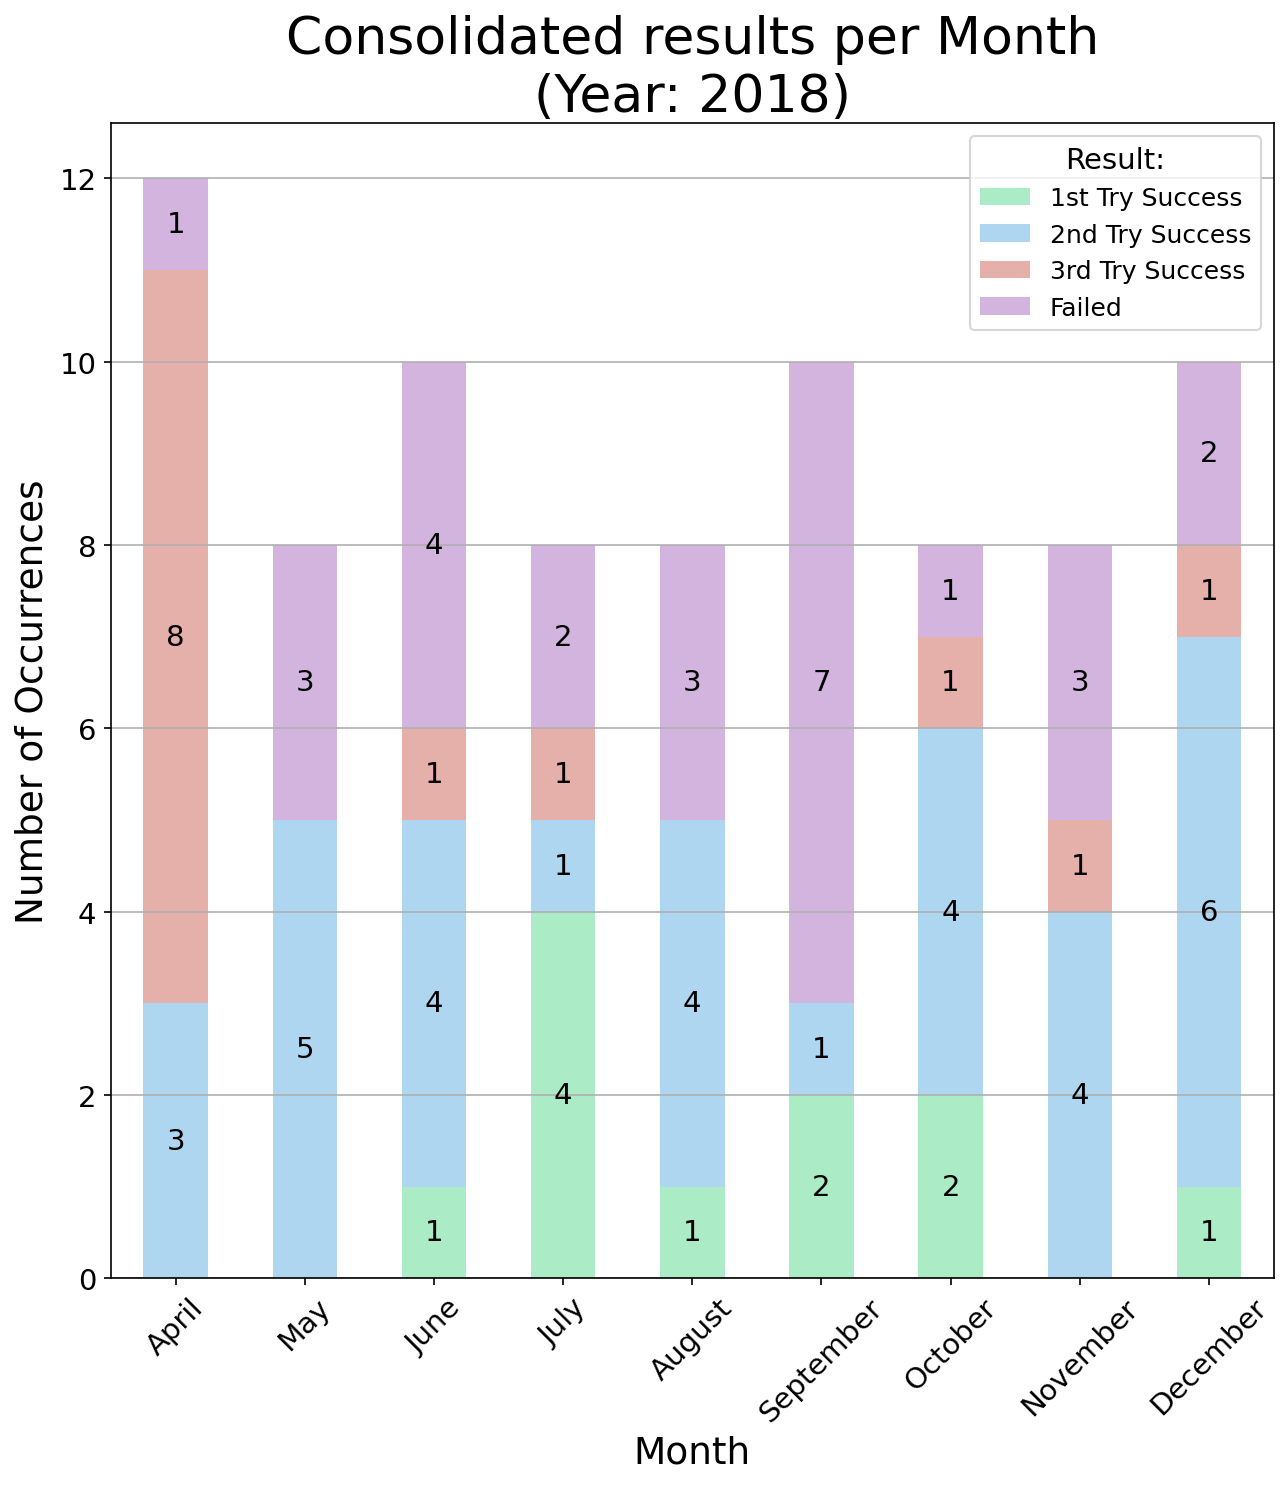

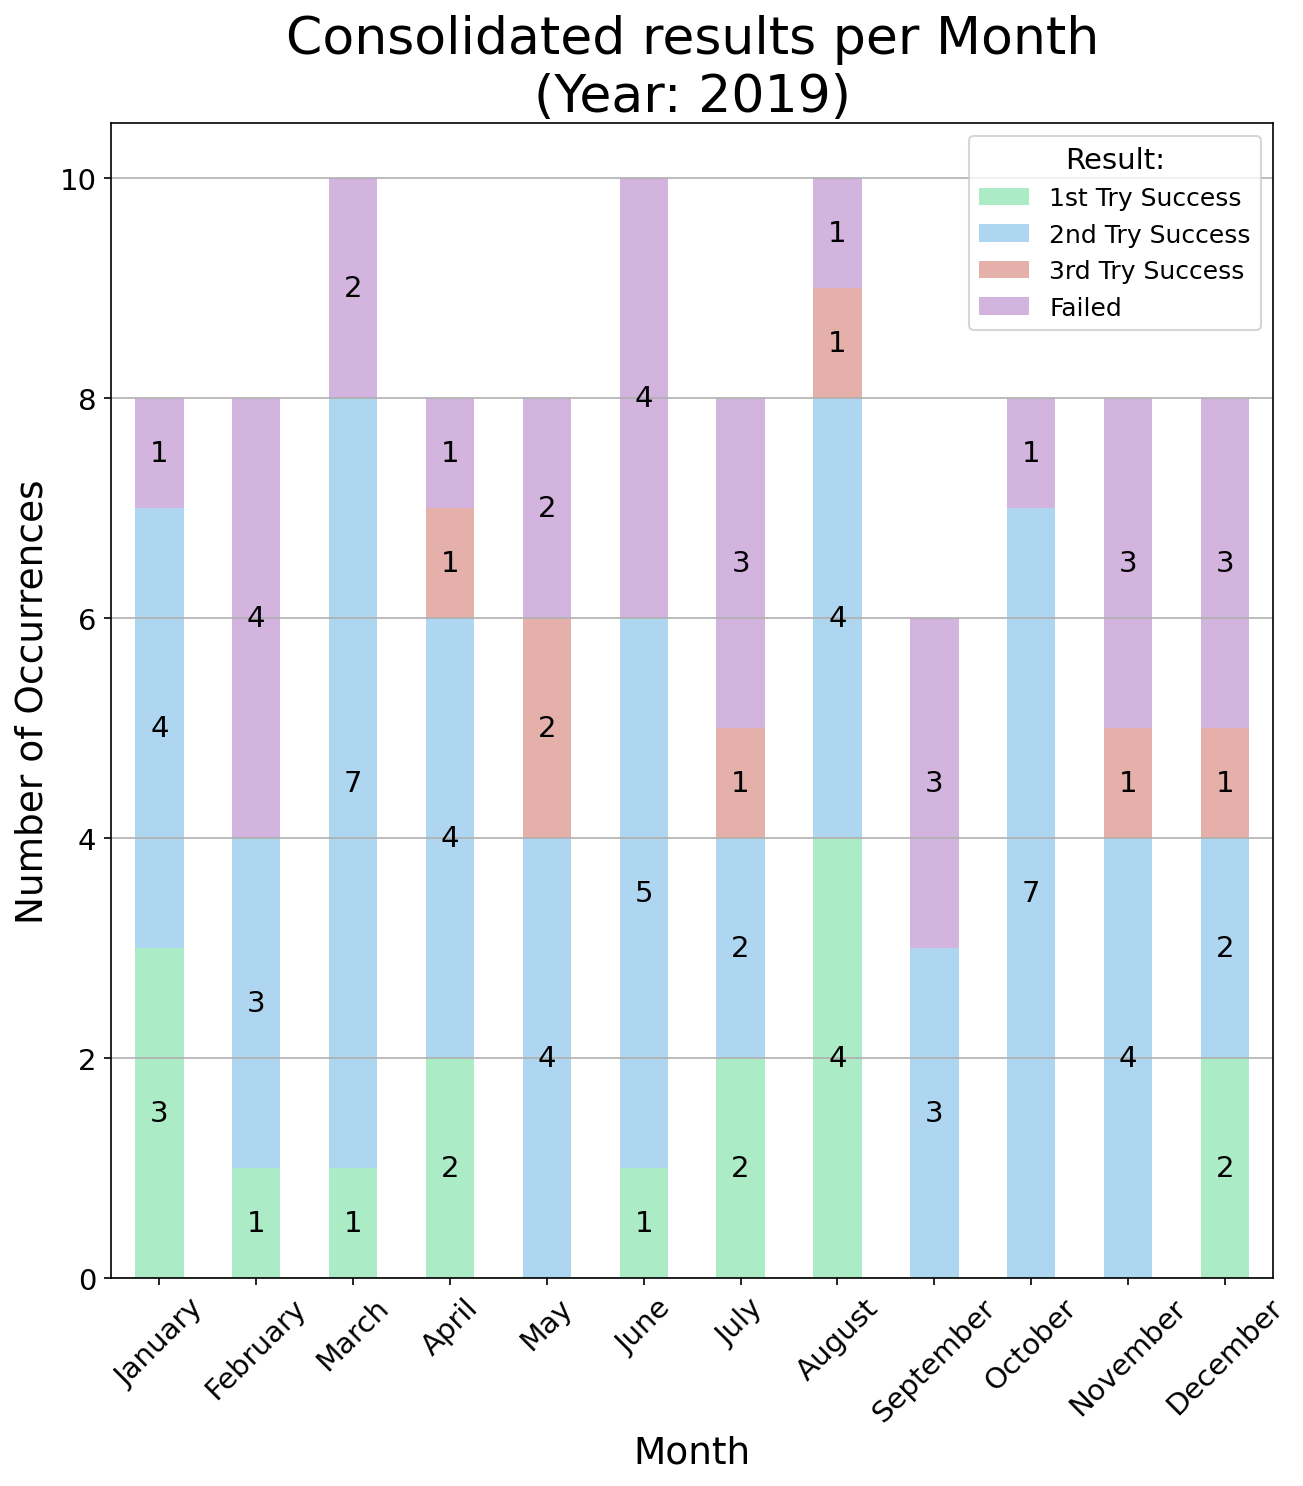

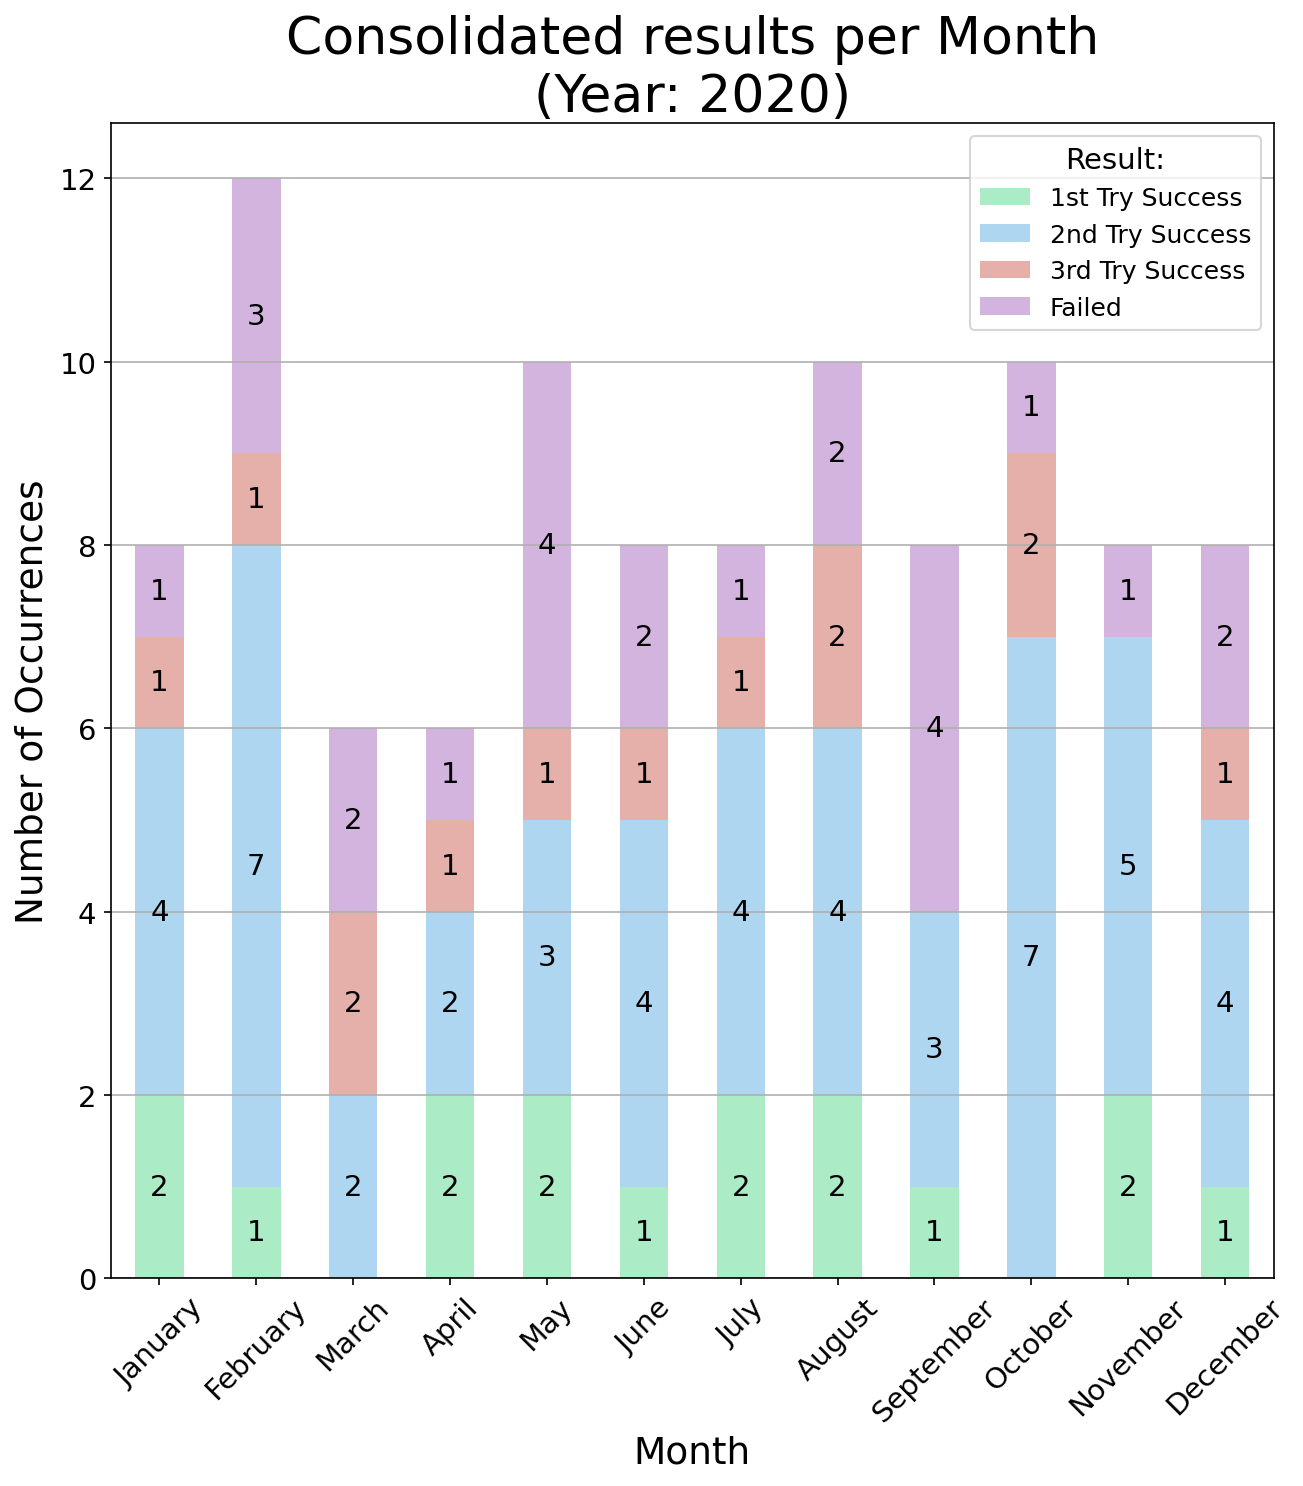

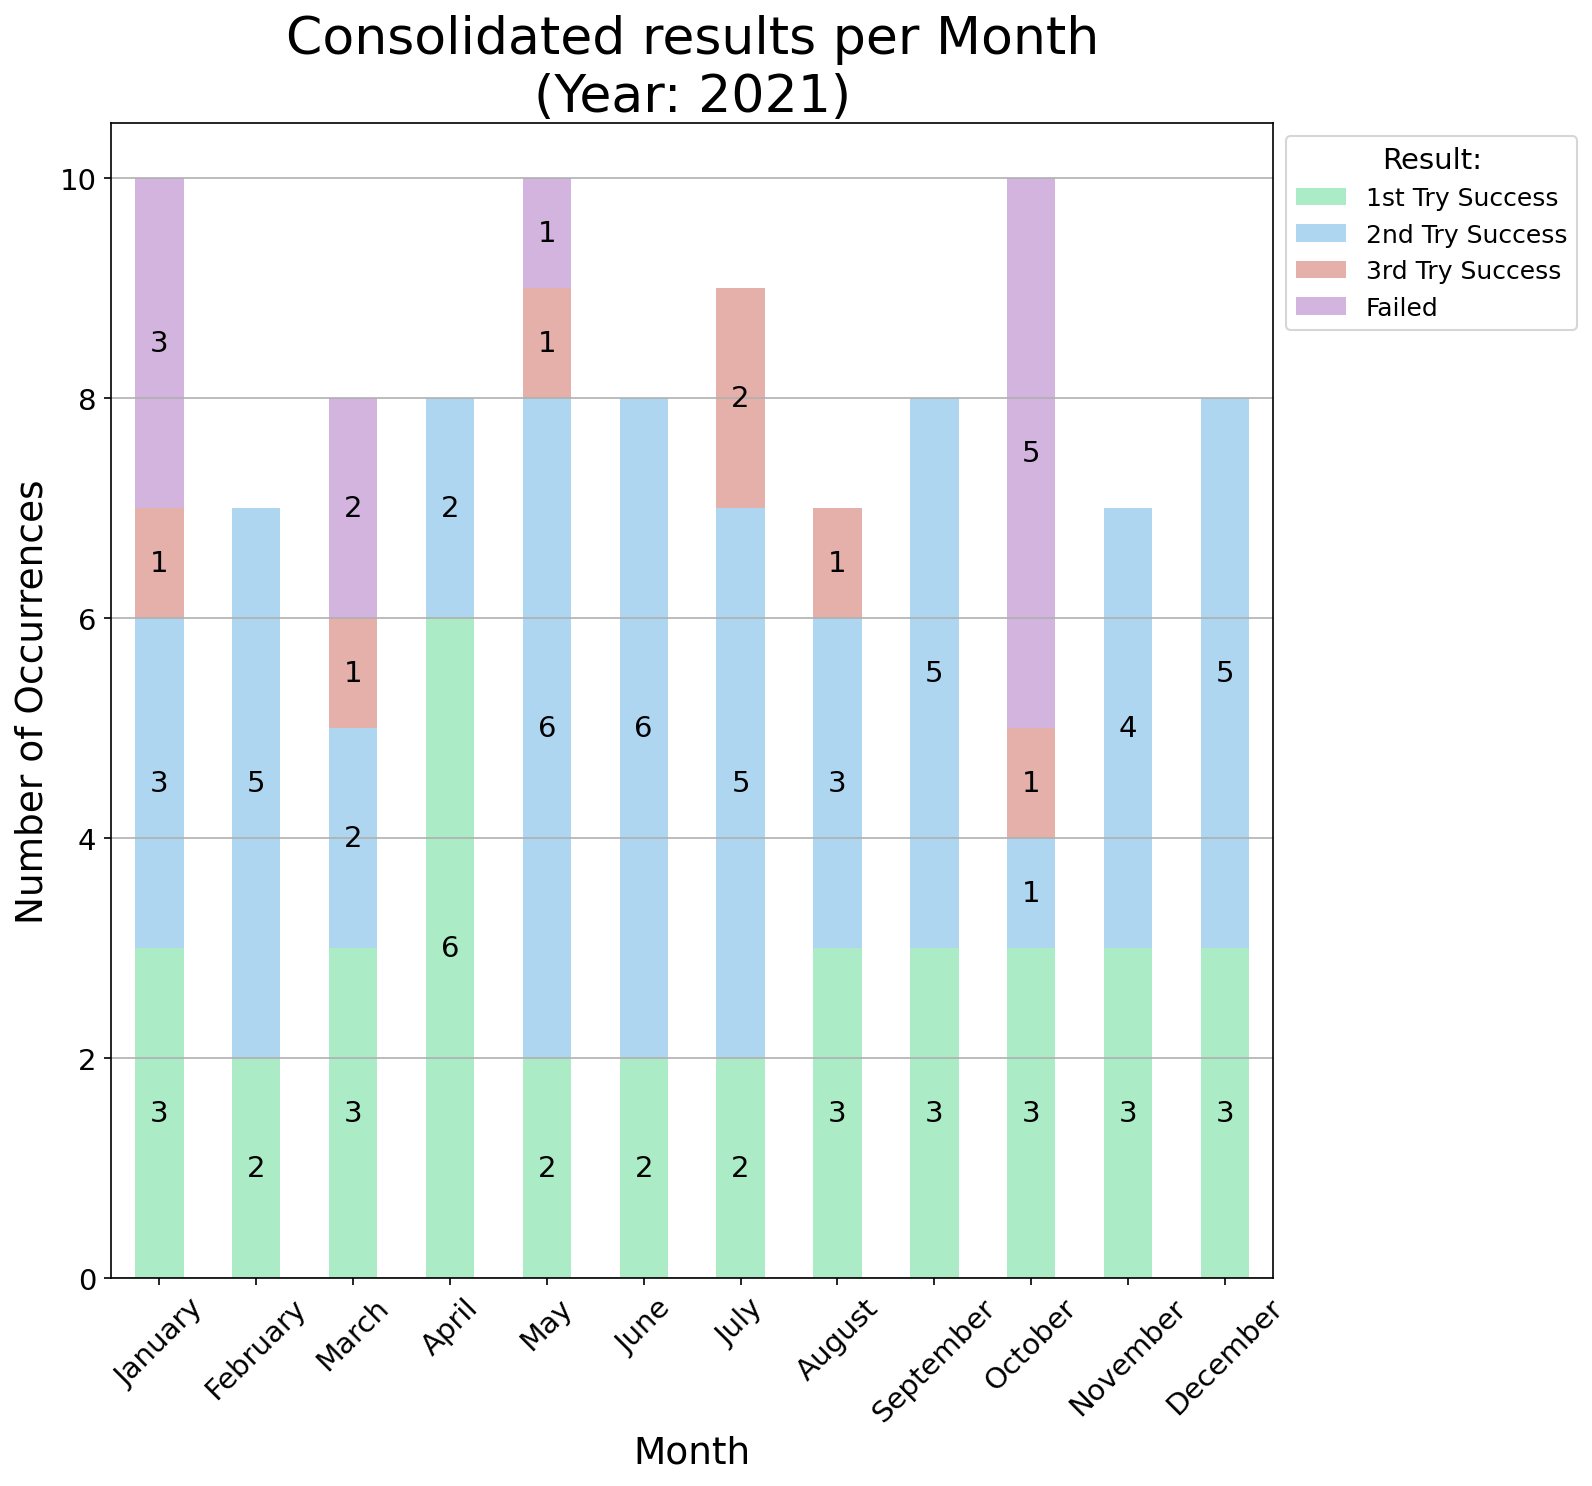

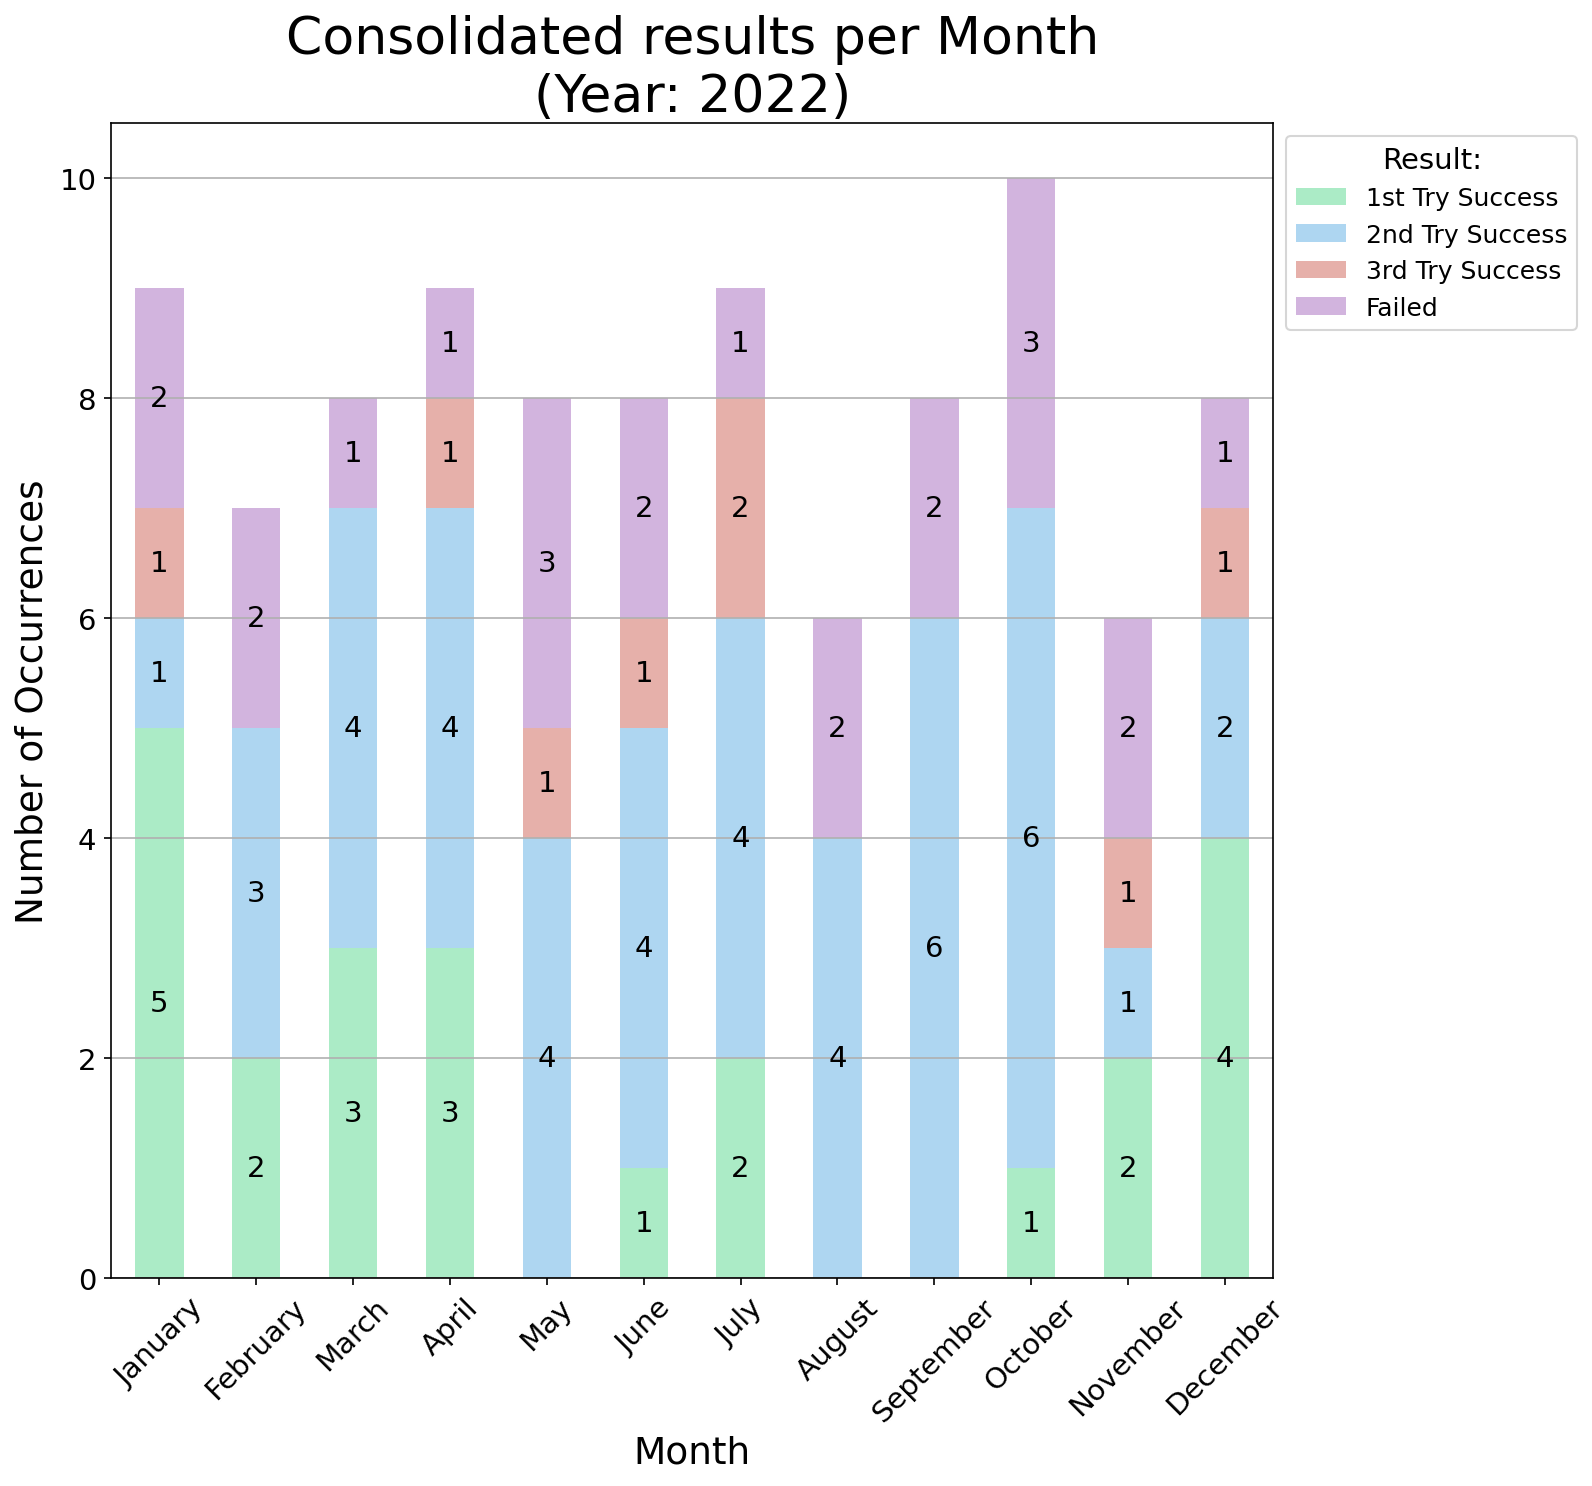

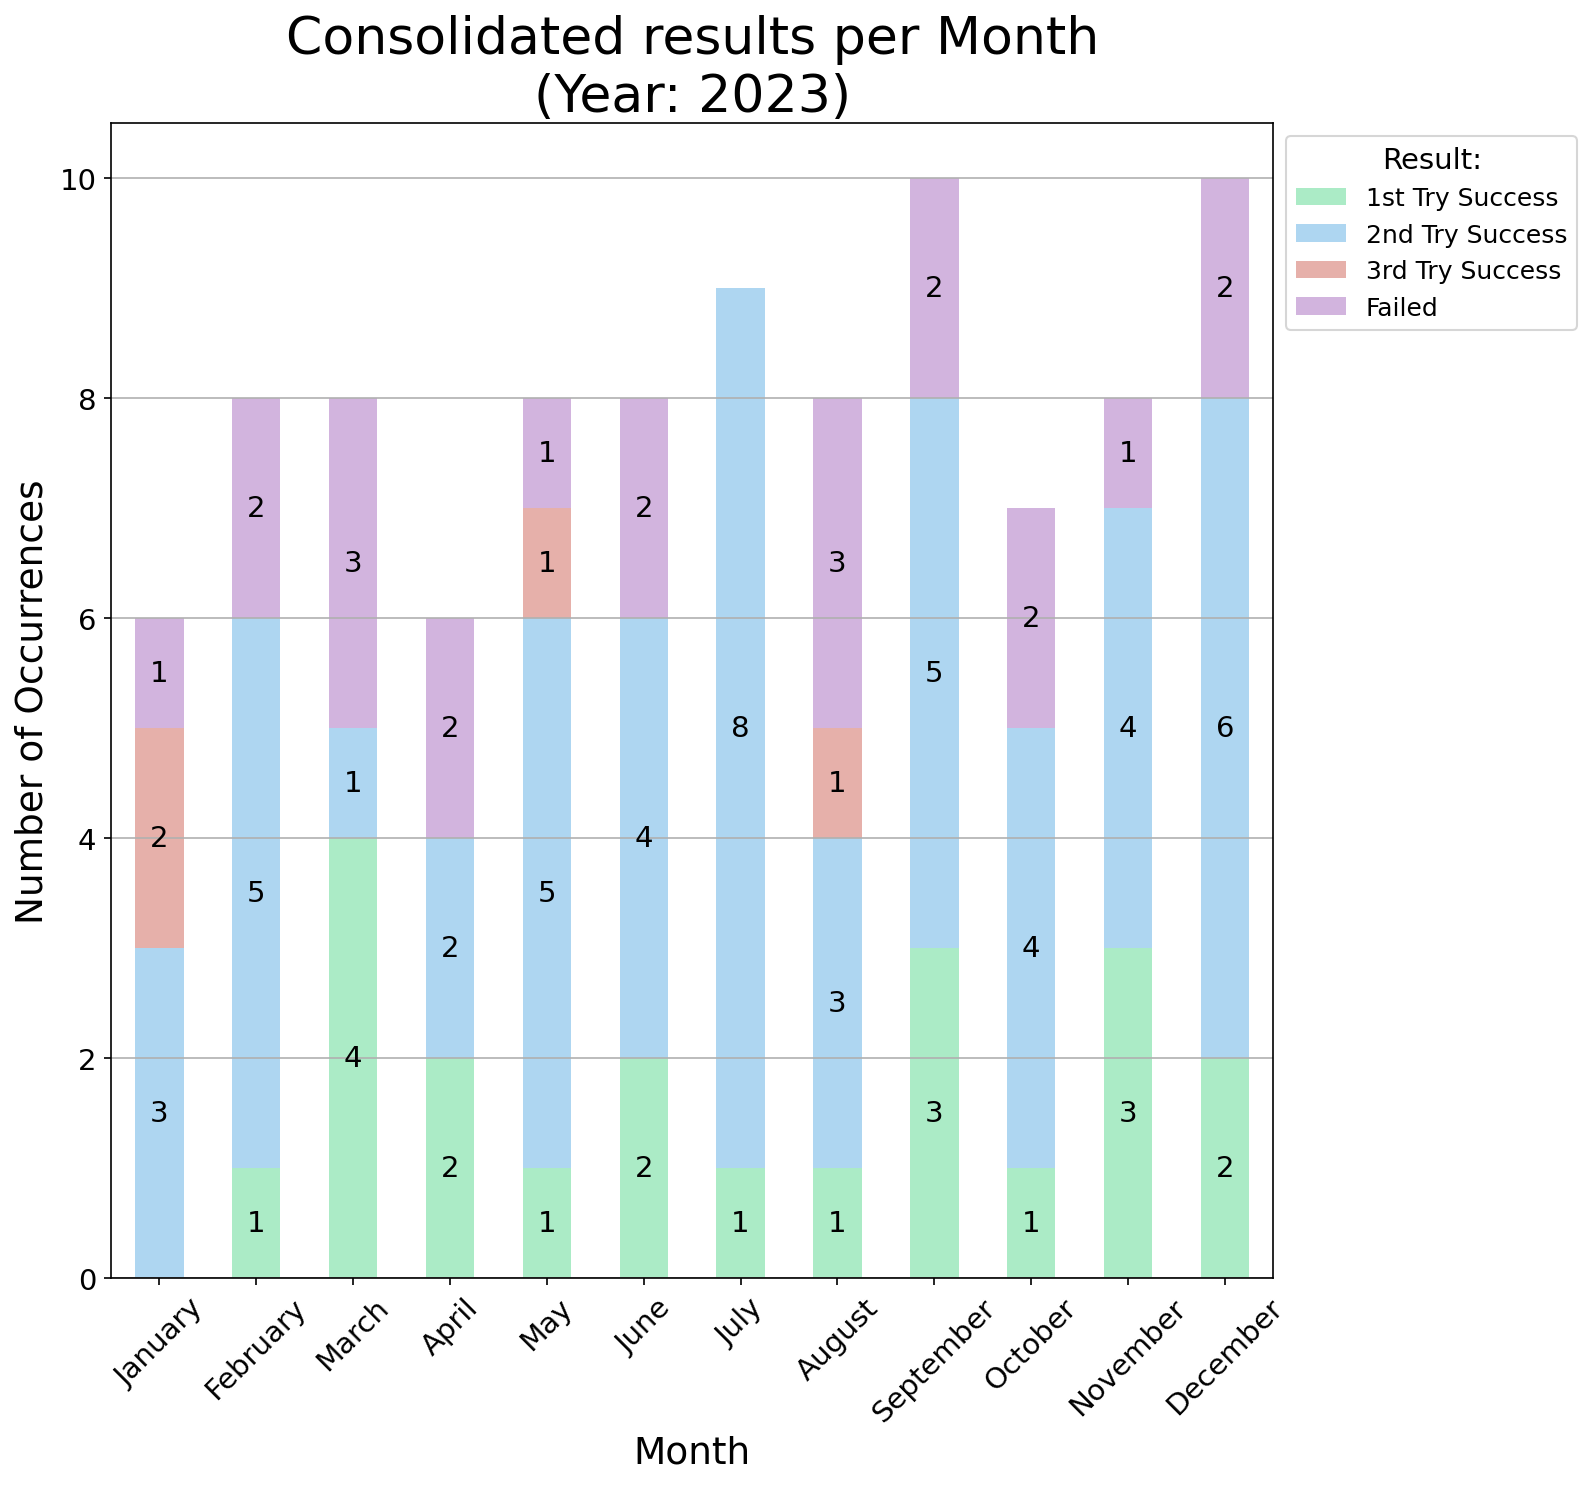

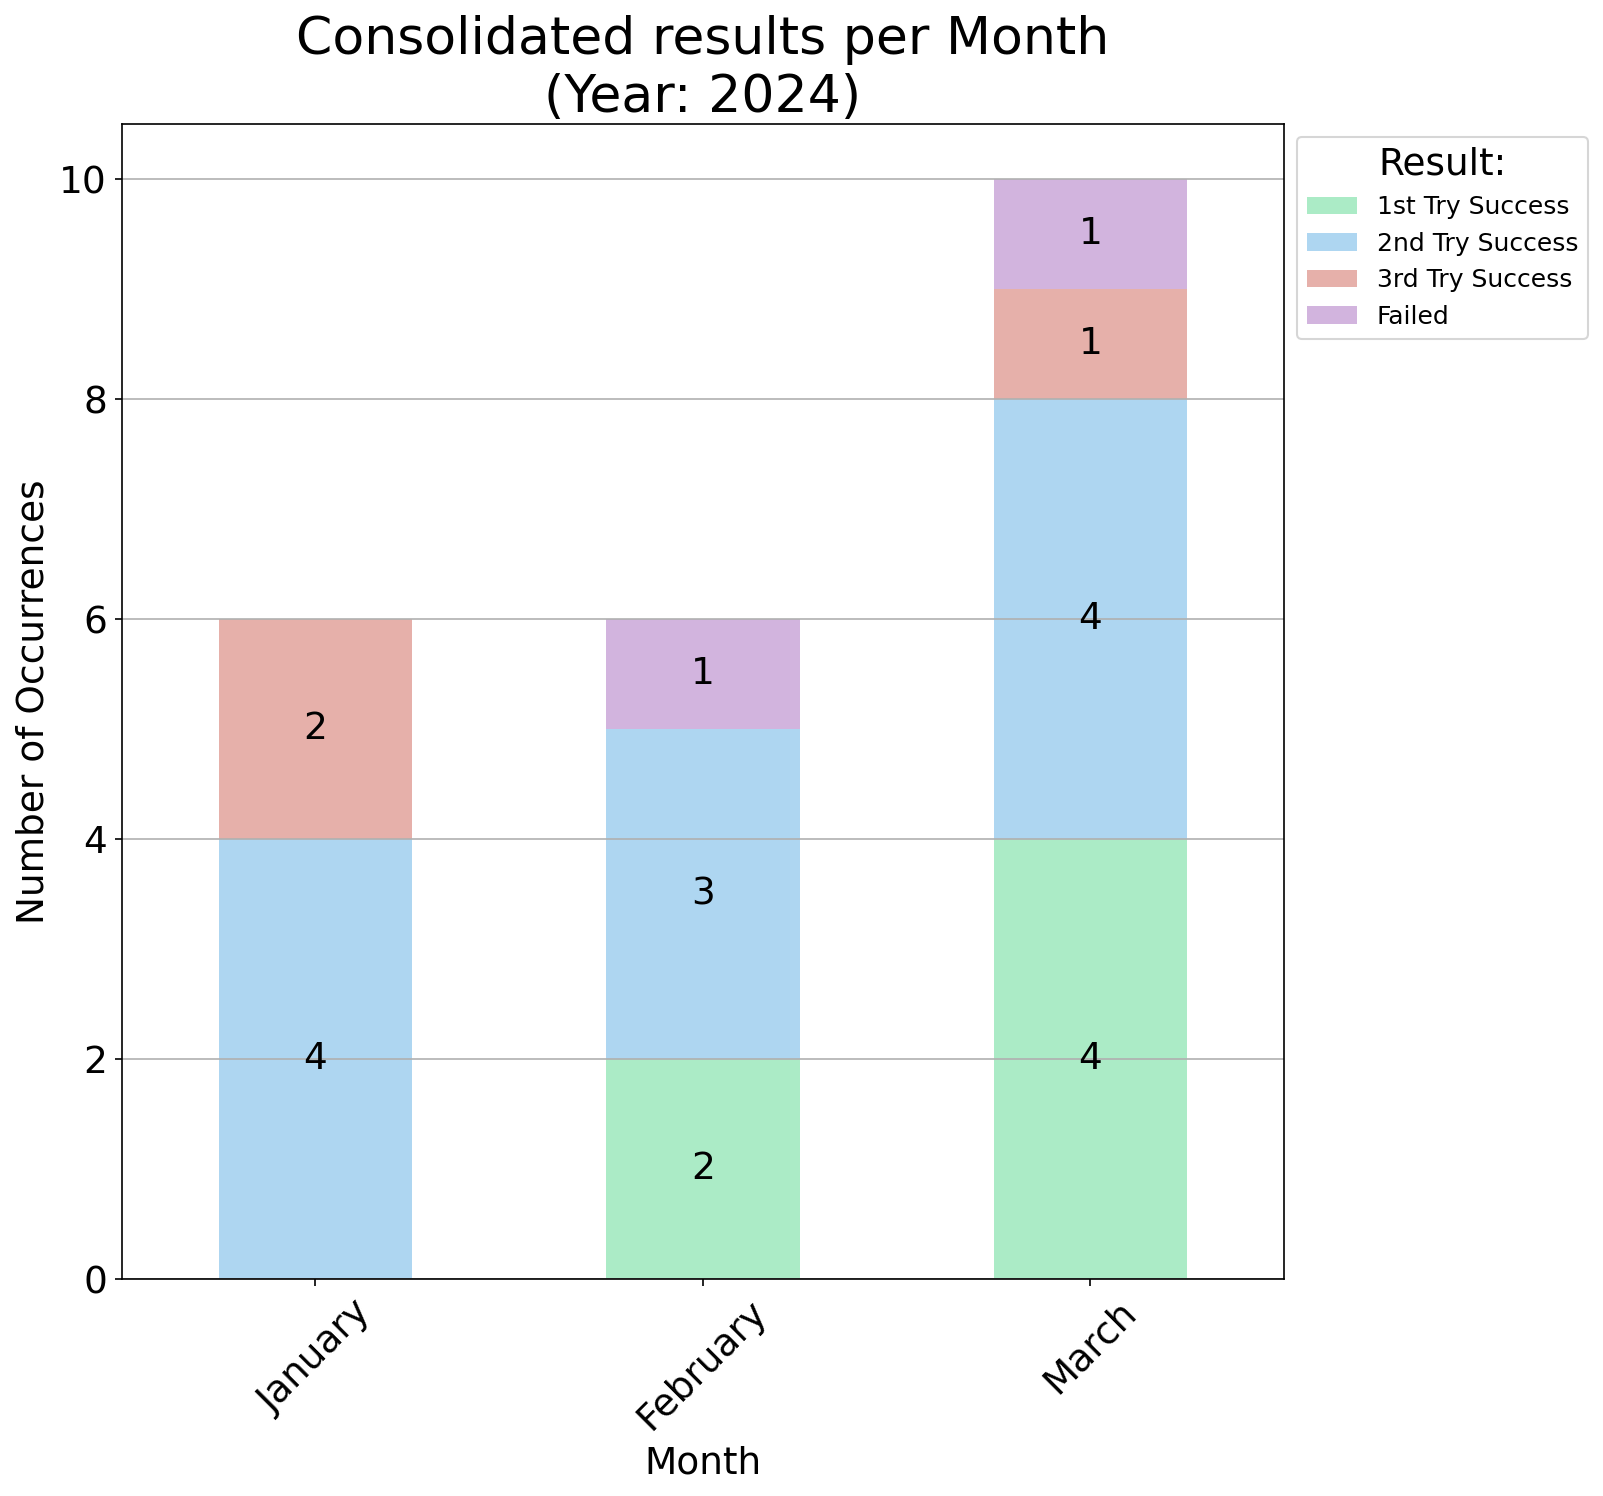

In [11]:
plot_months_per_year(df)

### With these plots, I can still say that my initial statement still holds true. 
### Finally, let's use the second function to see the correlation of each Month for each Year:

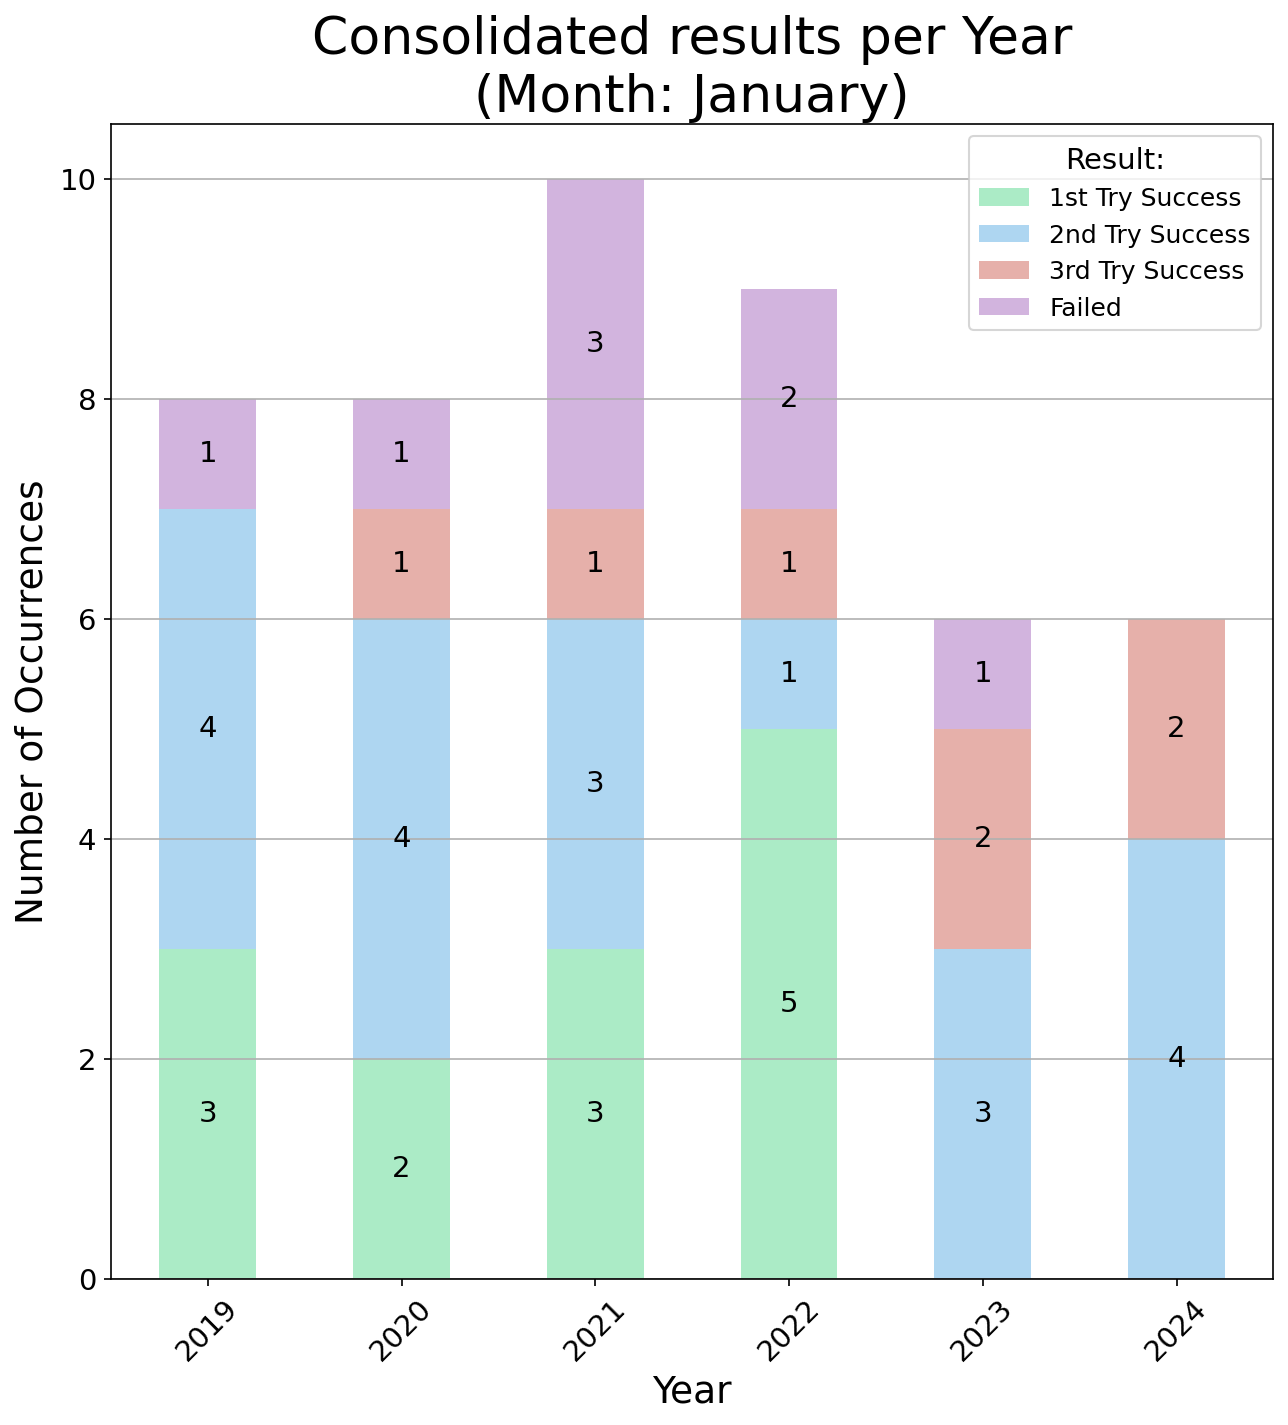

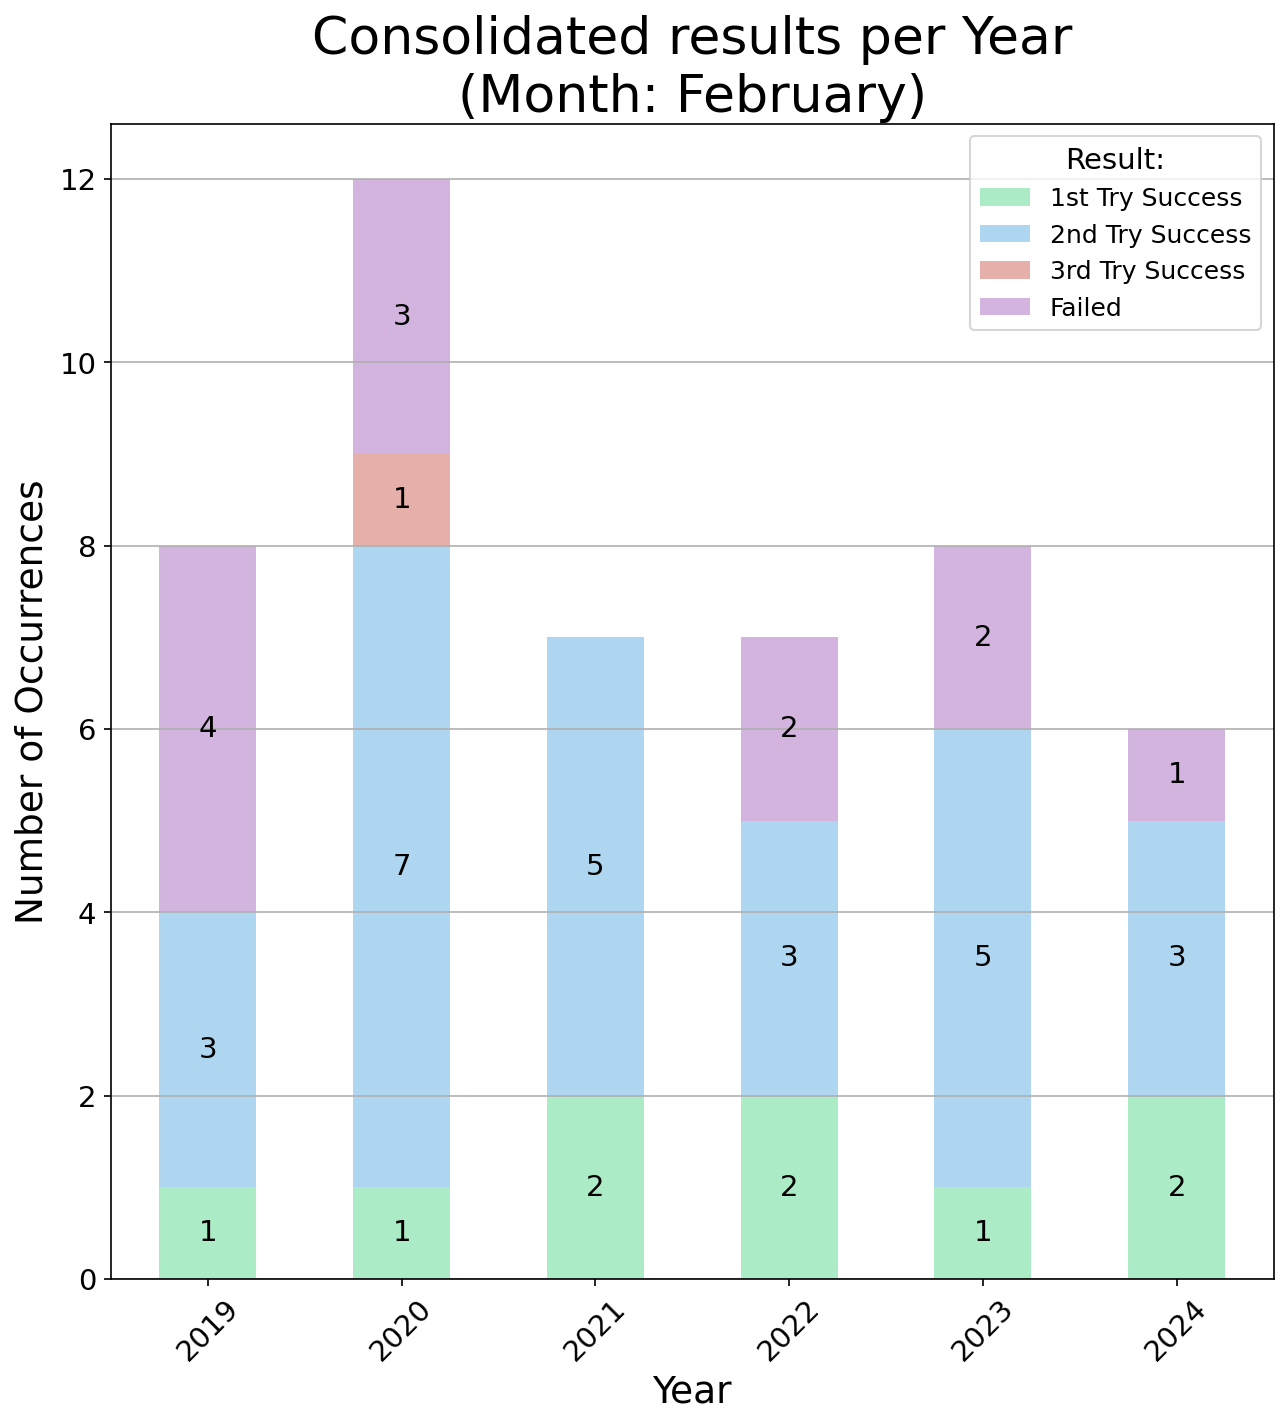

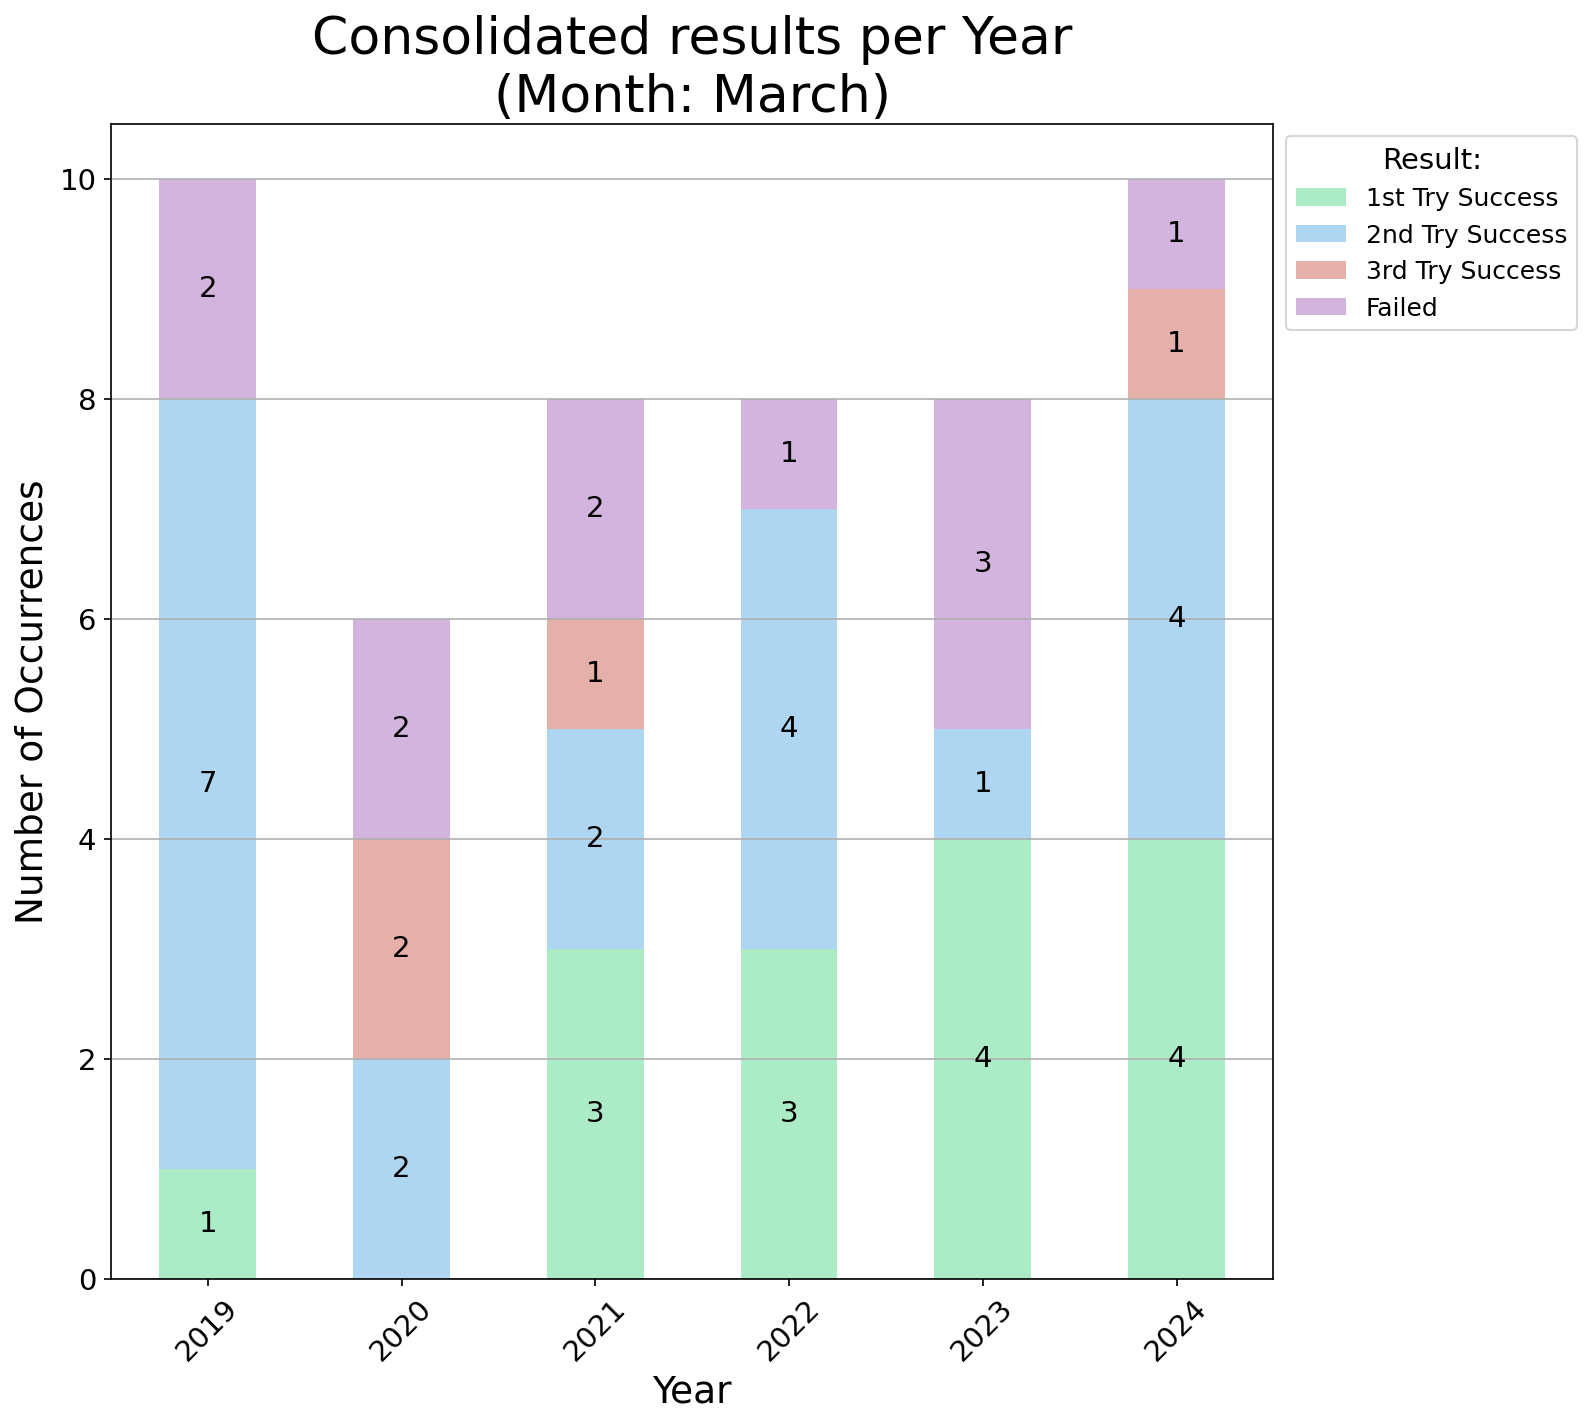

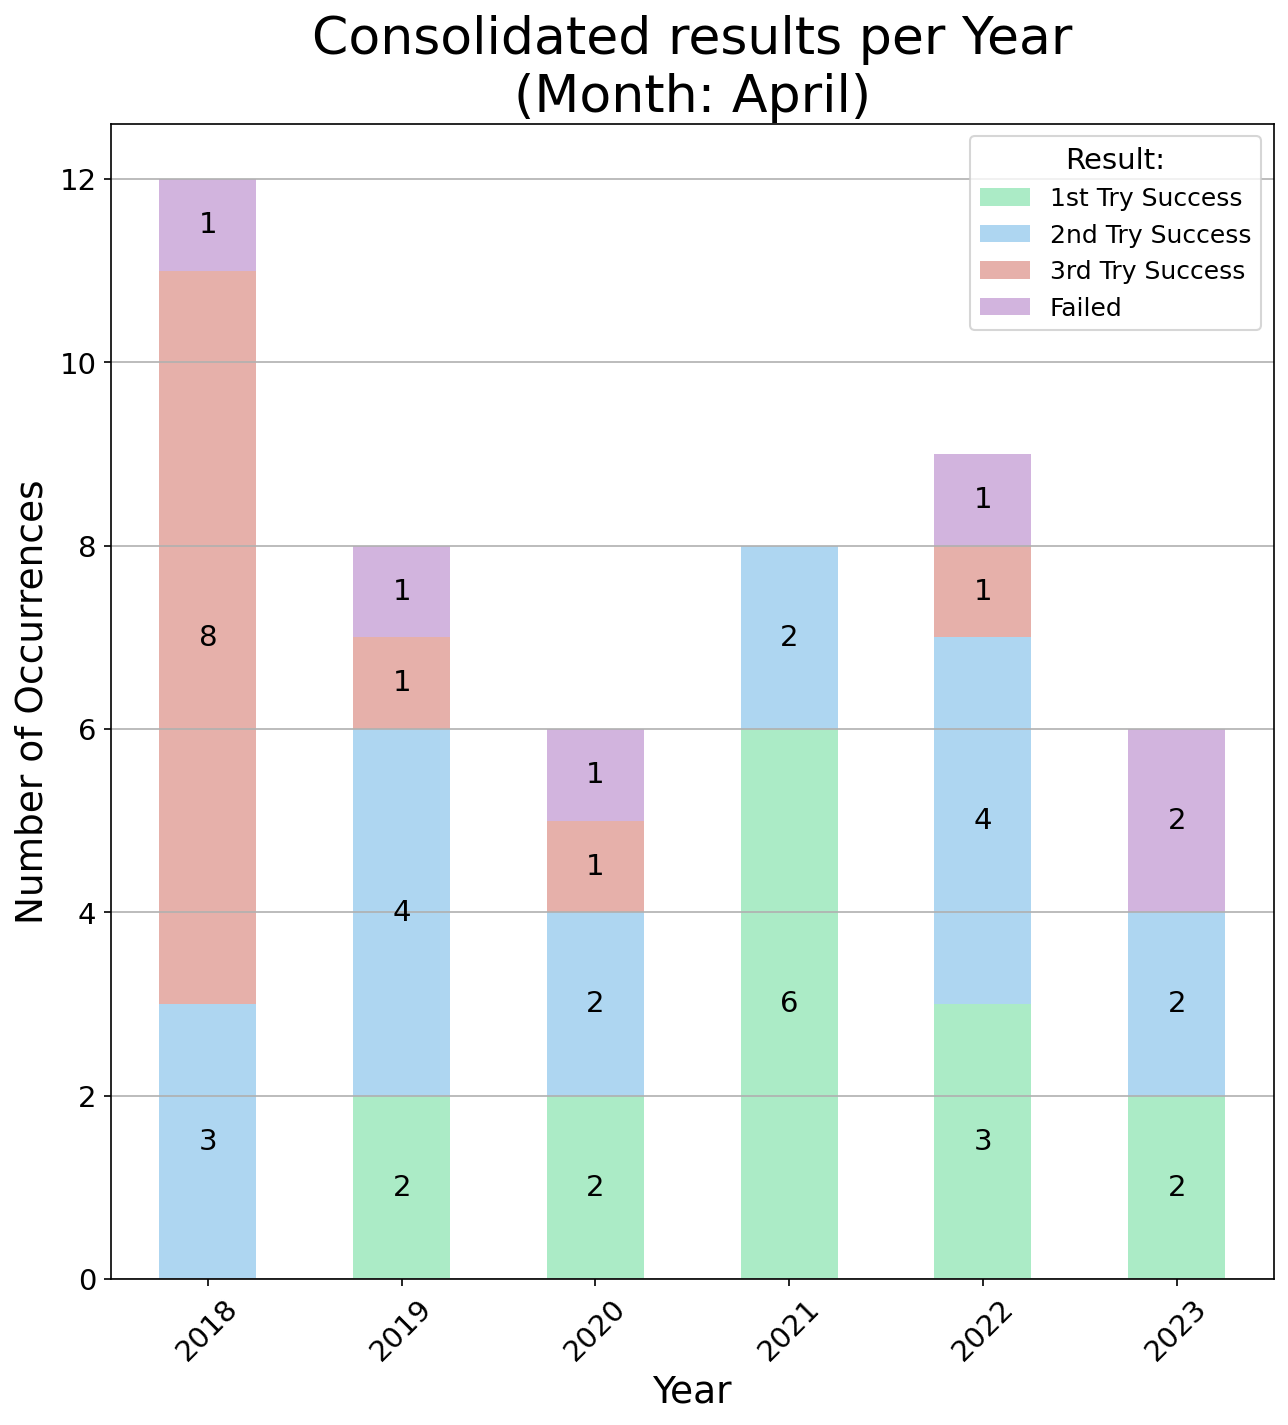

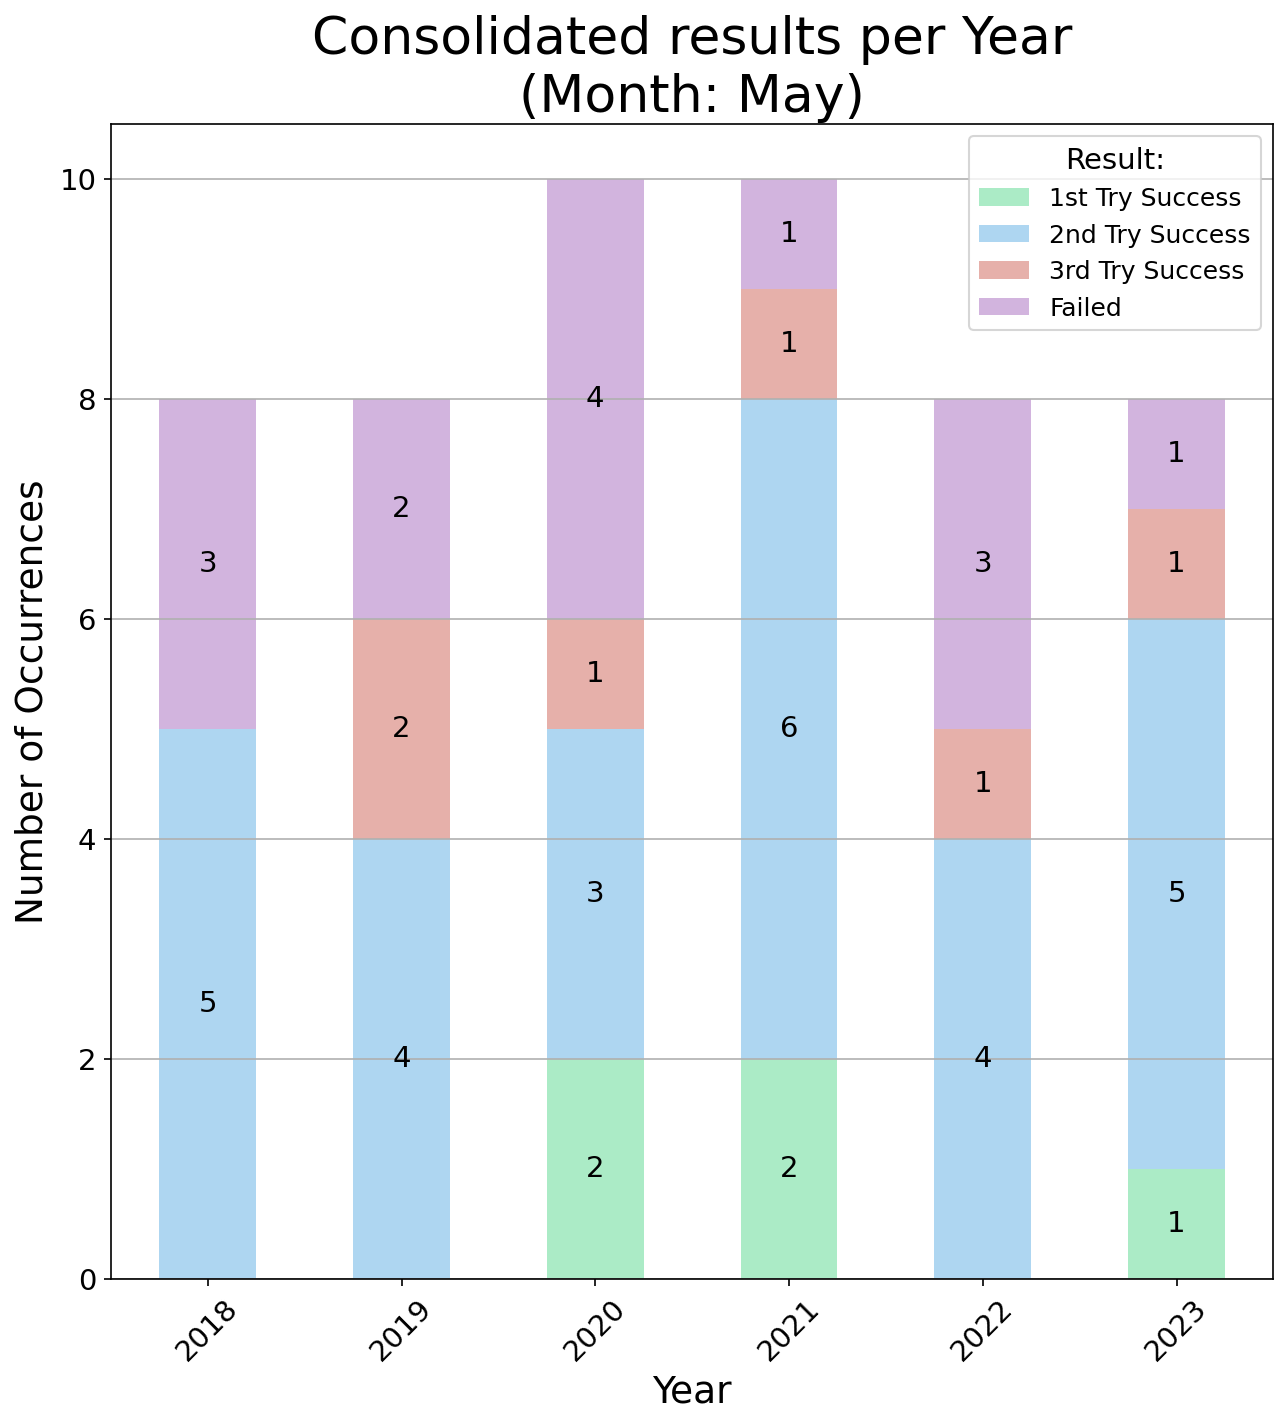

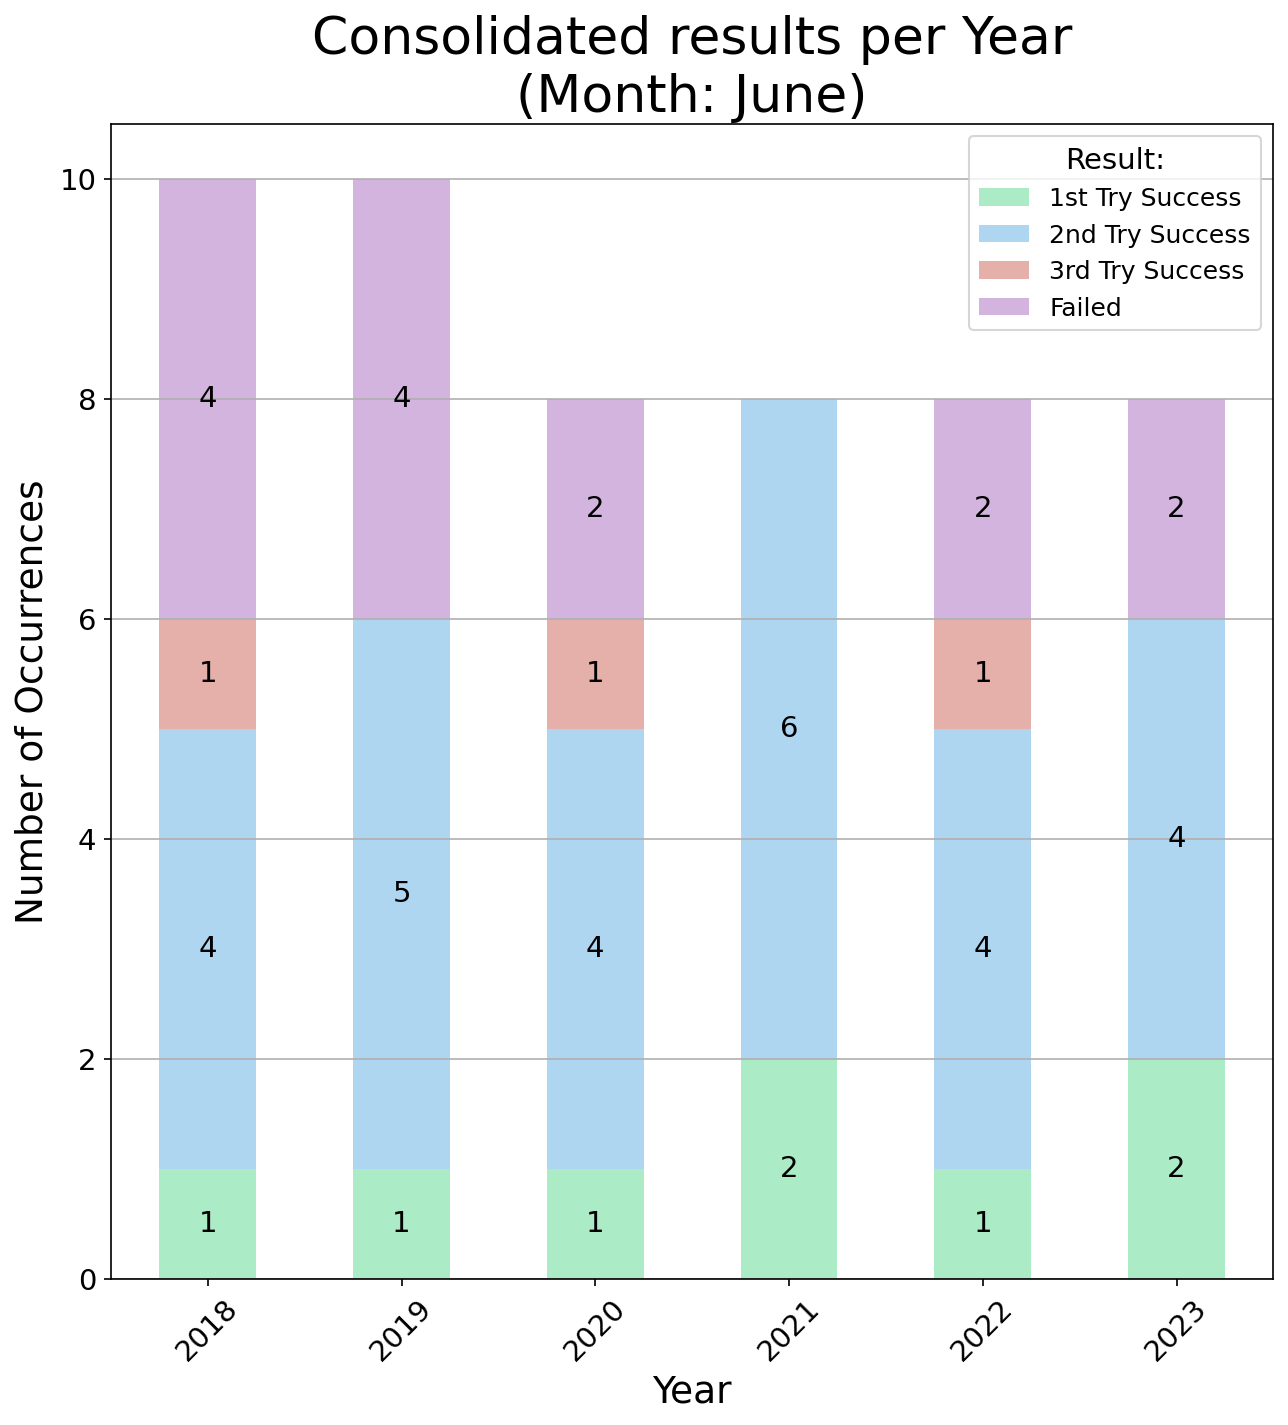

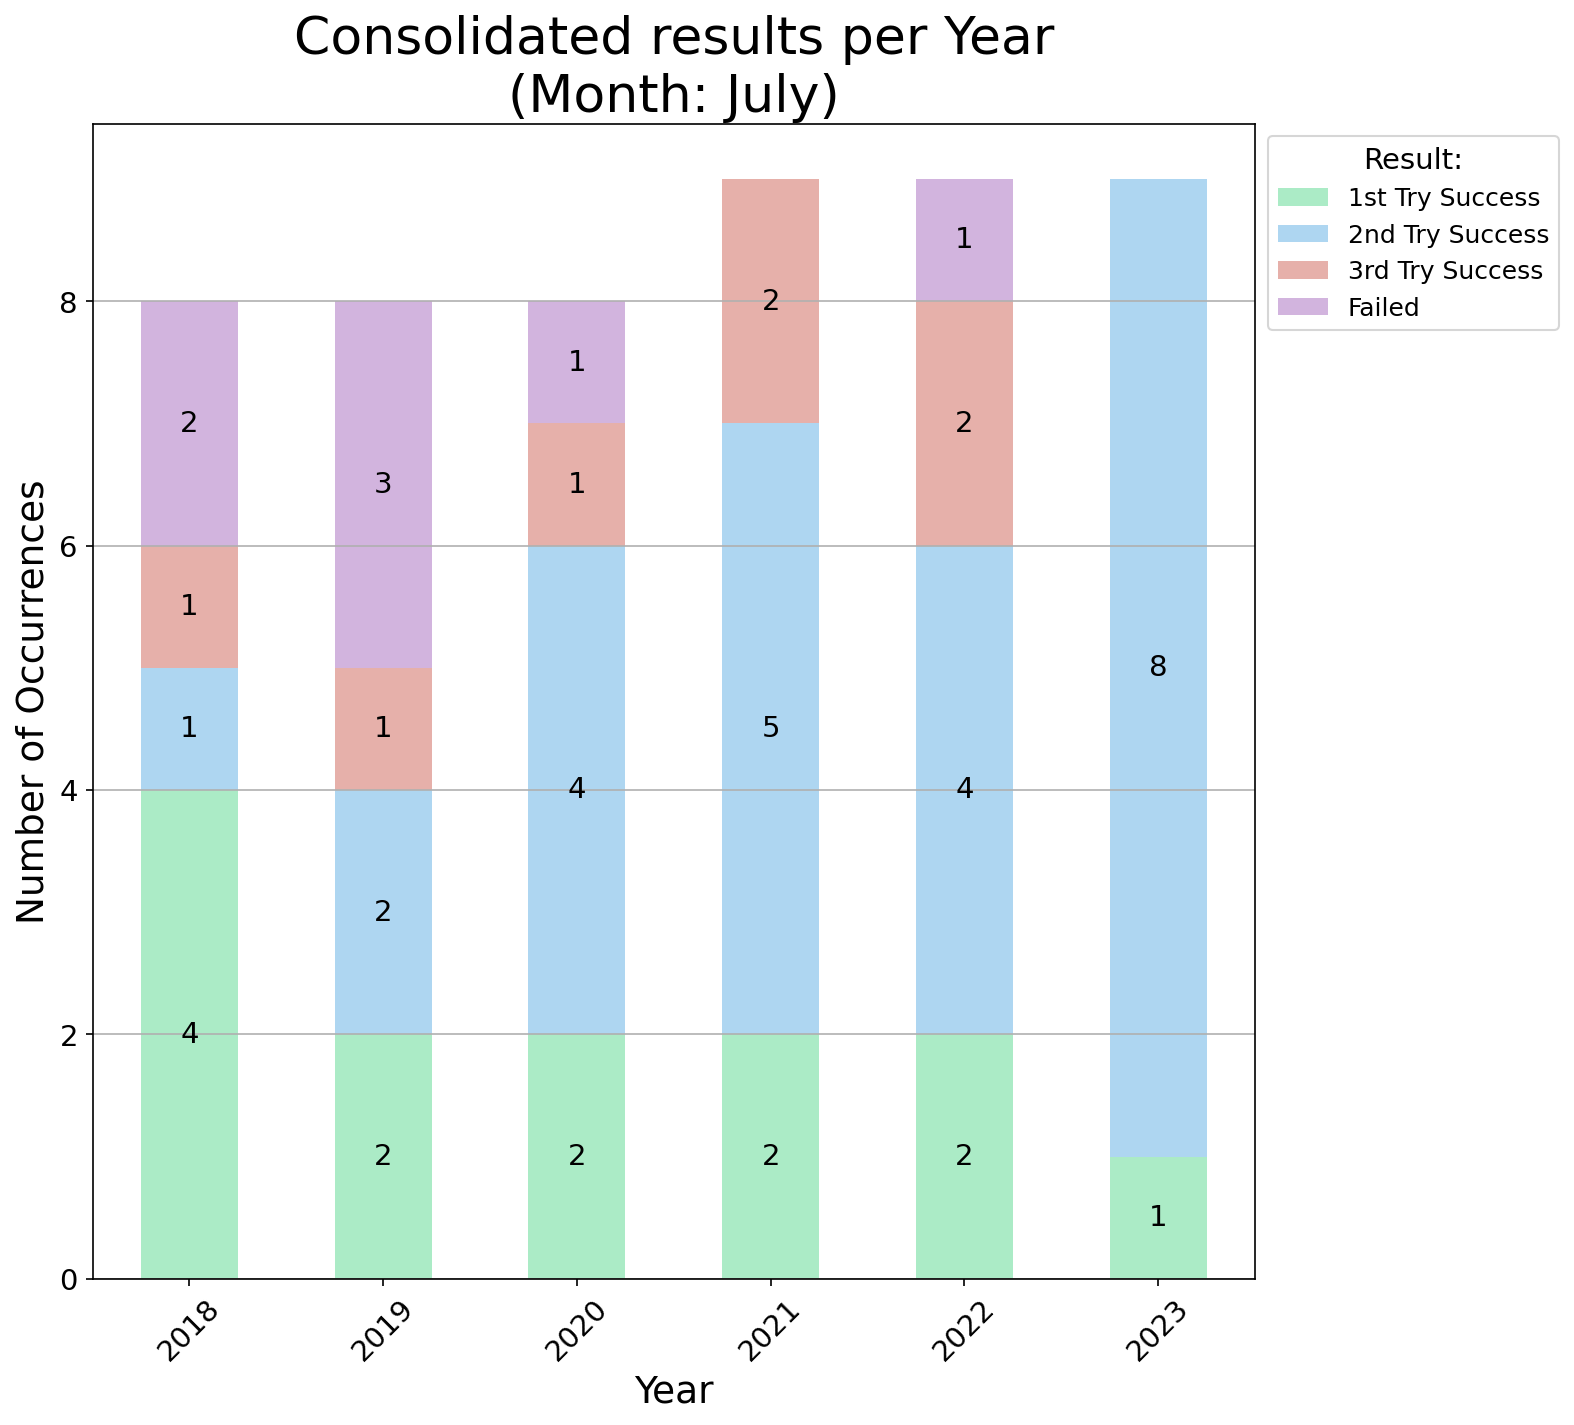

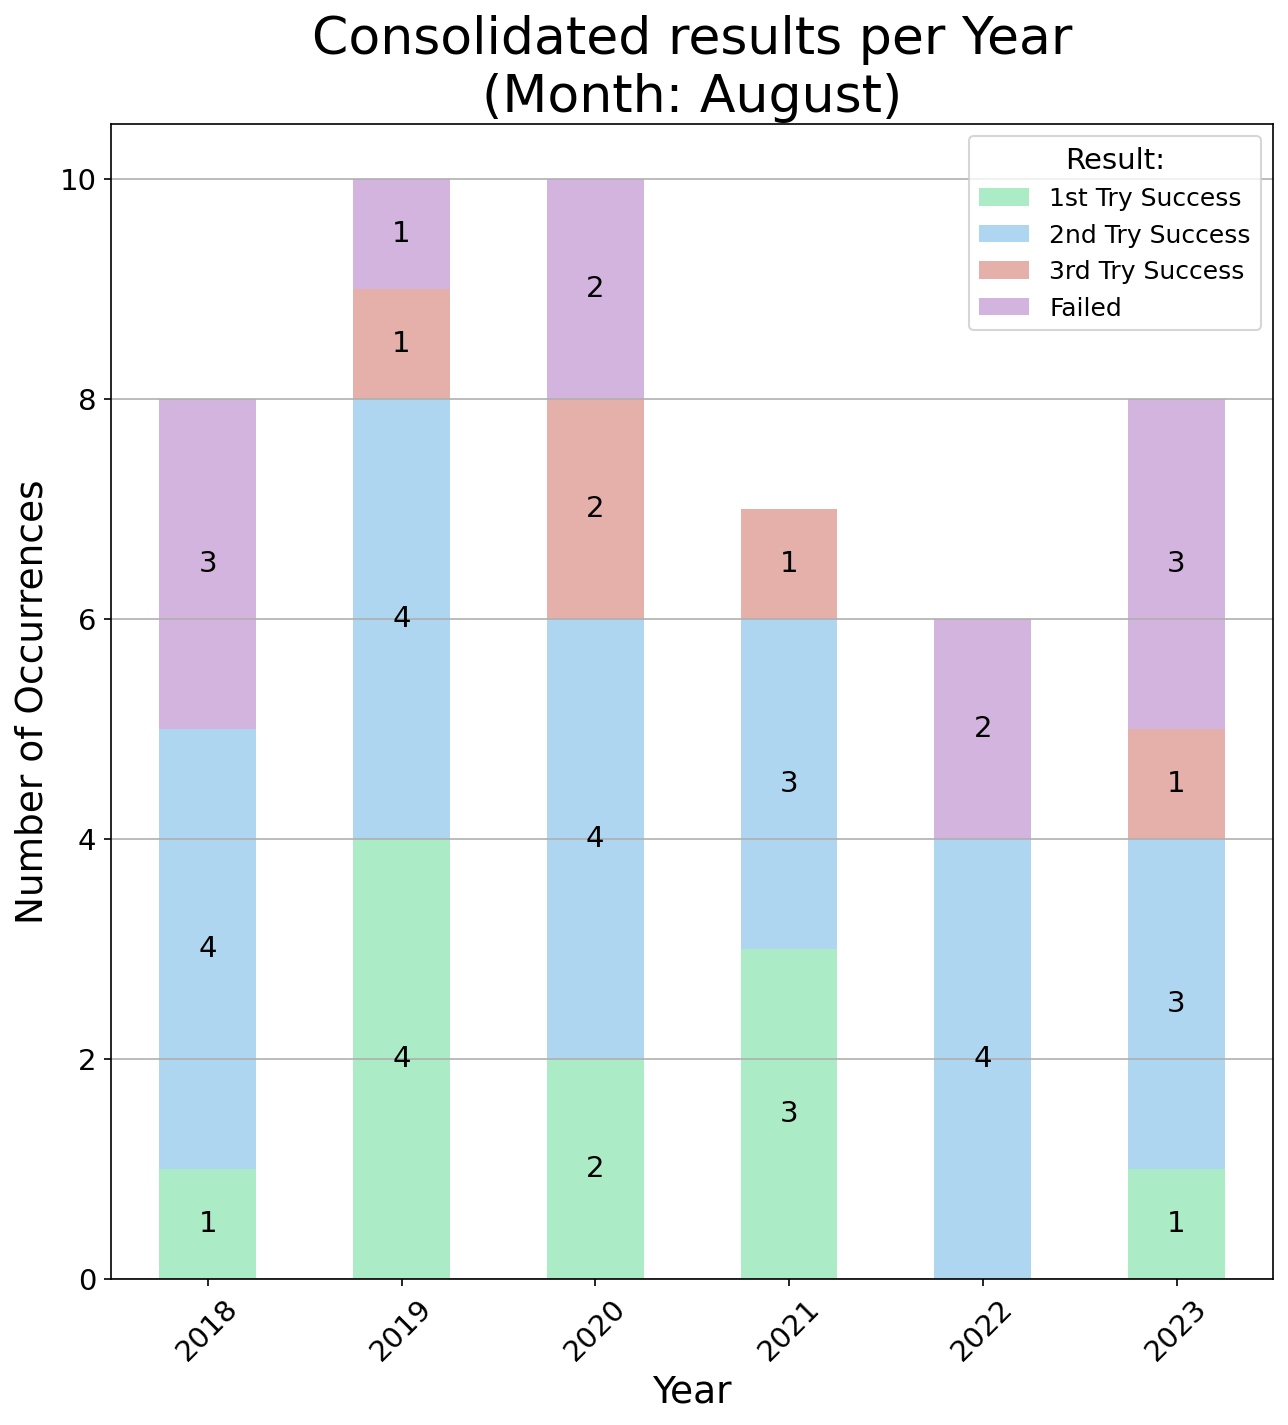

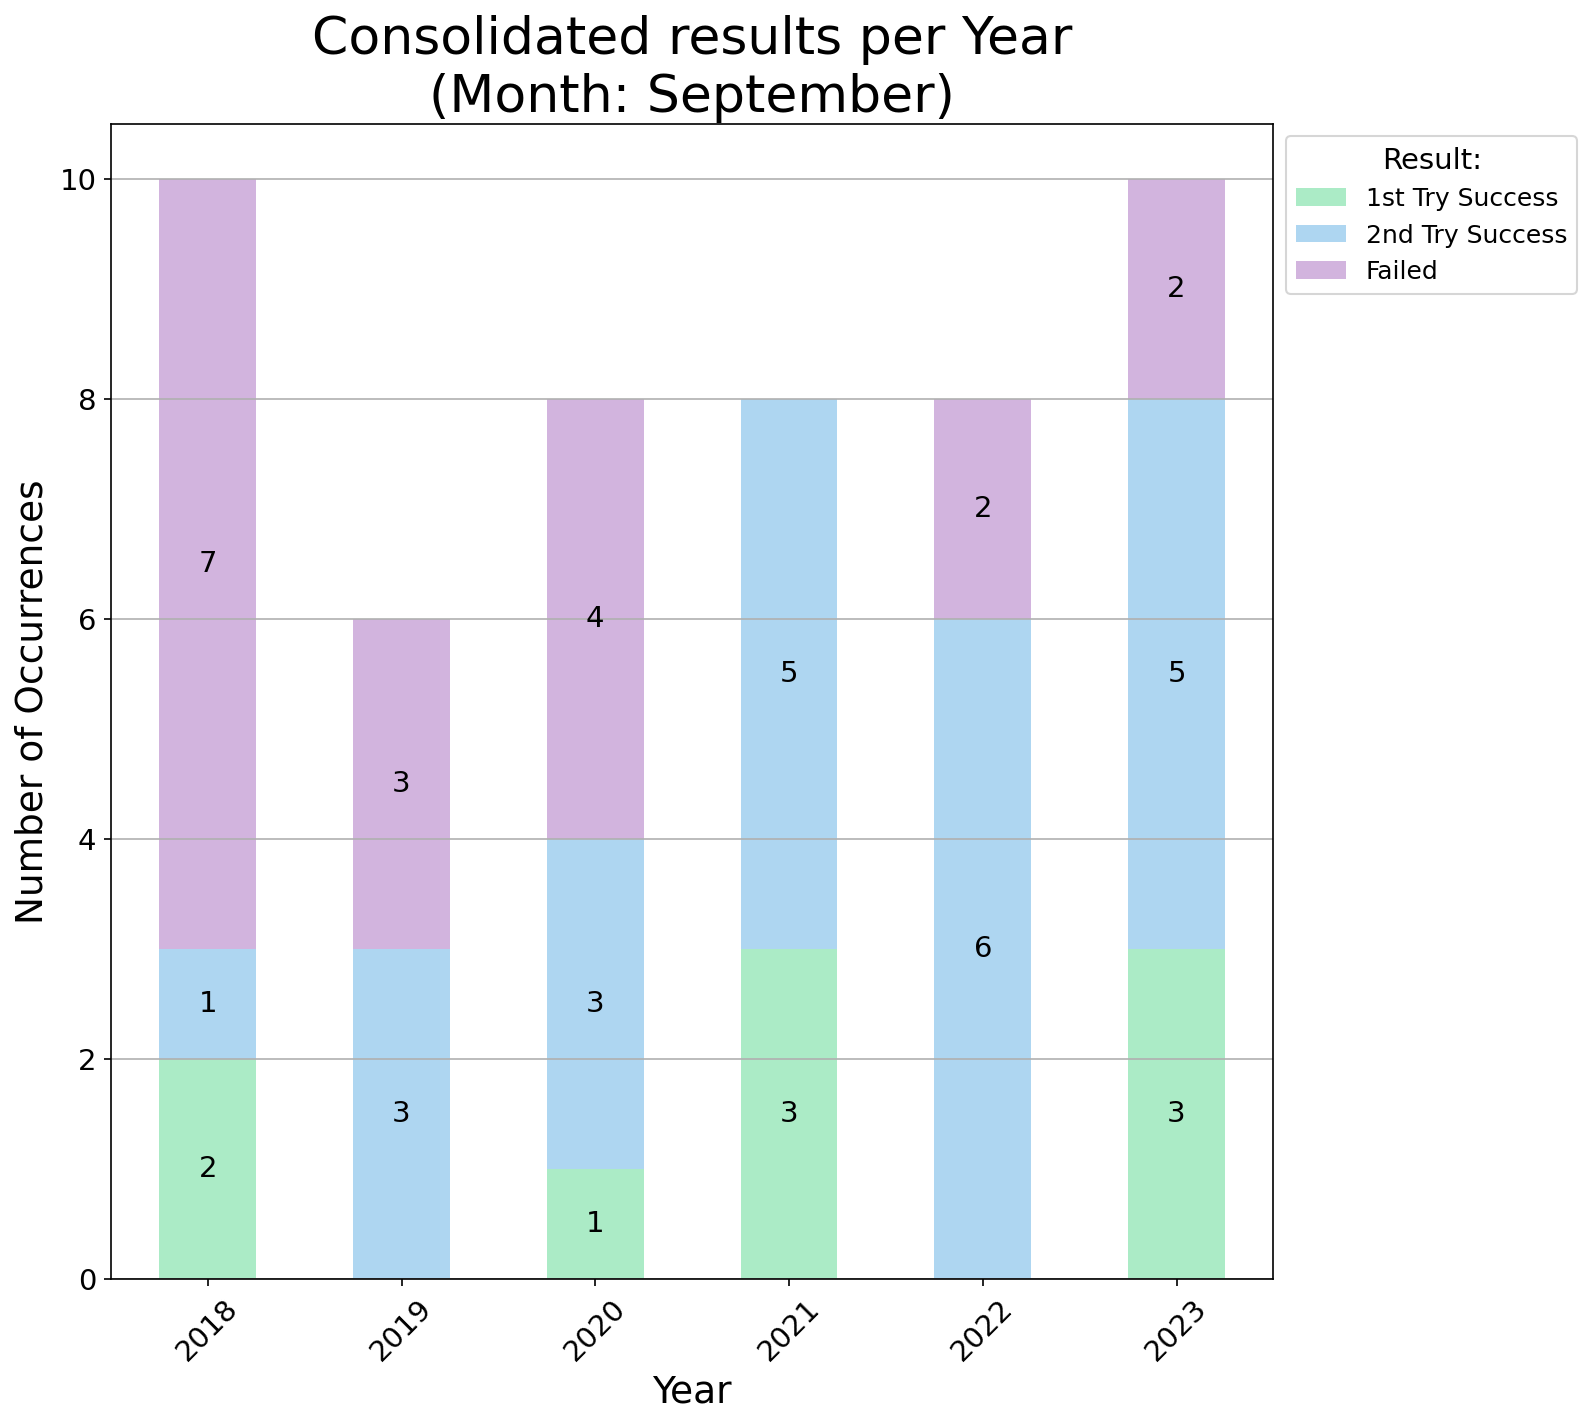

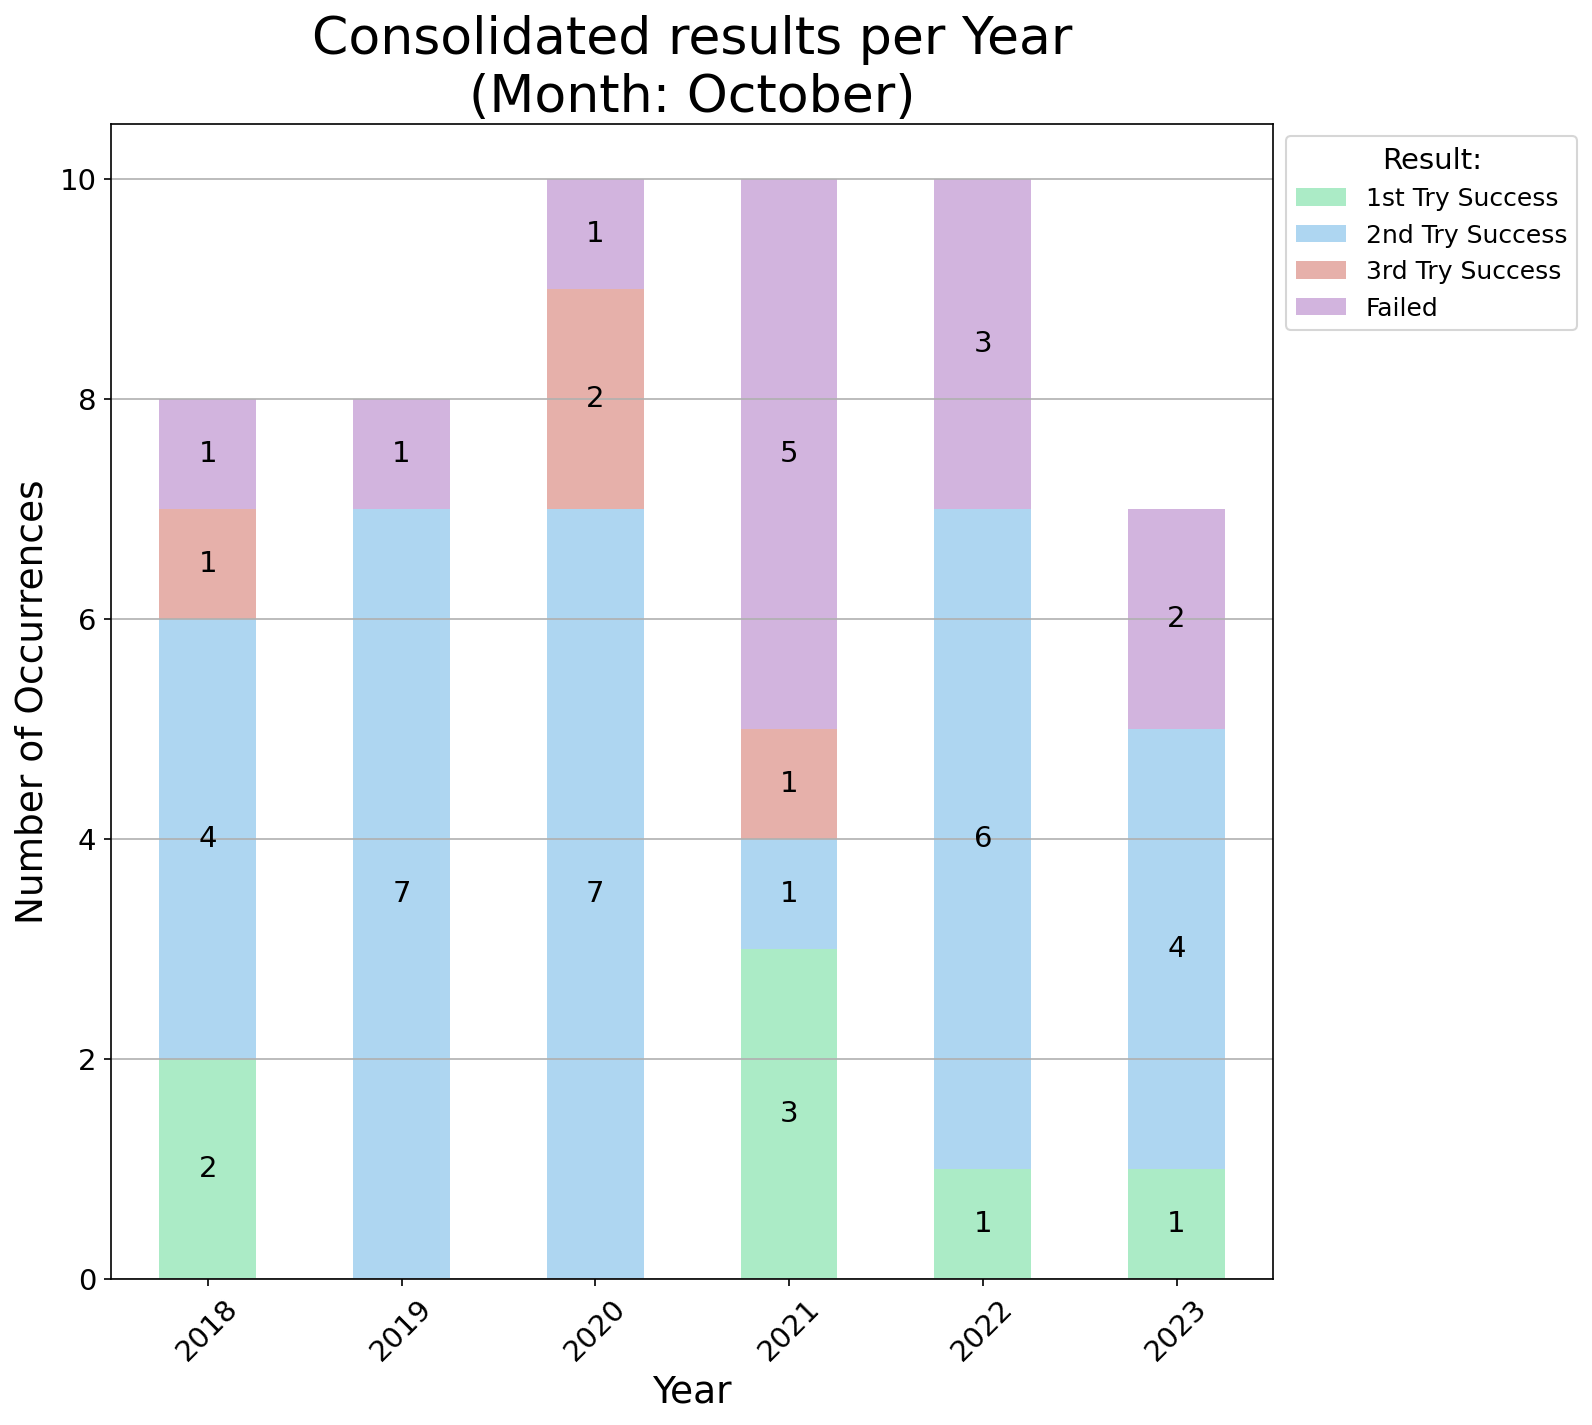

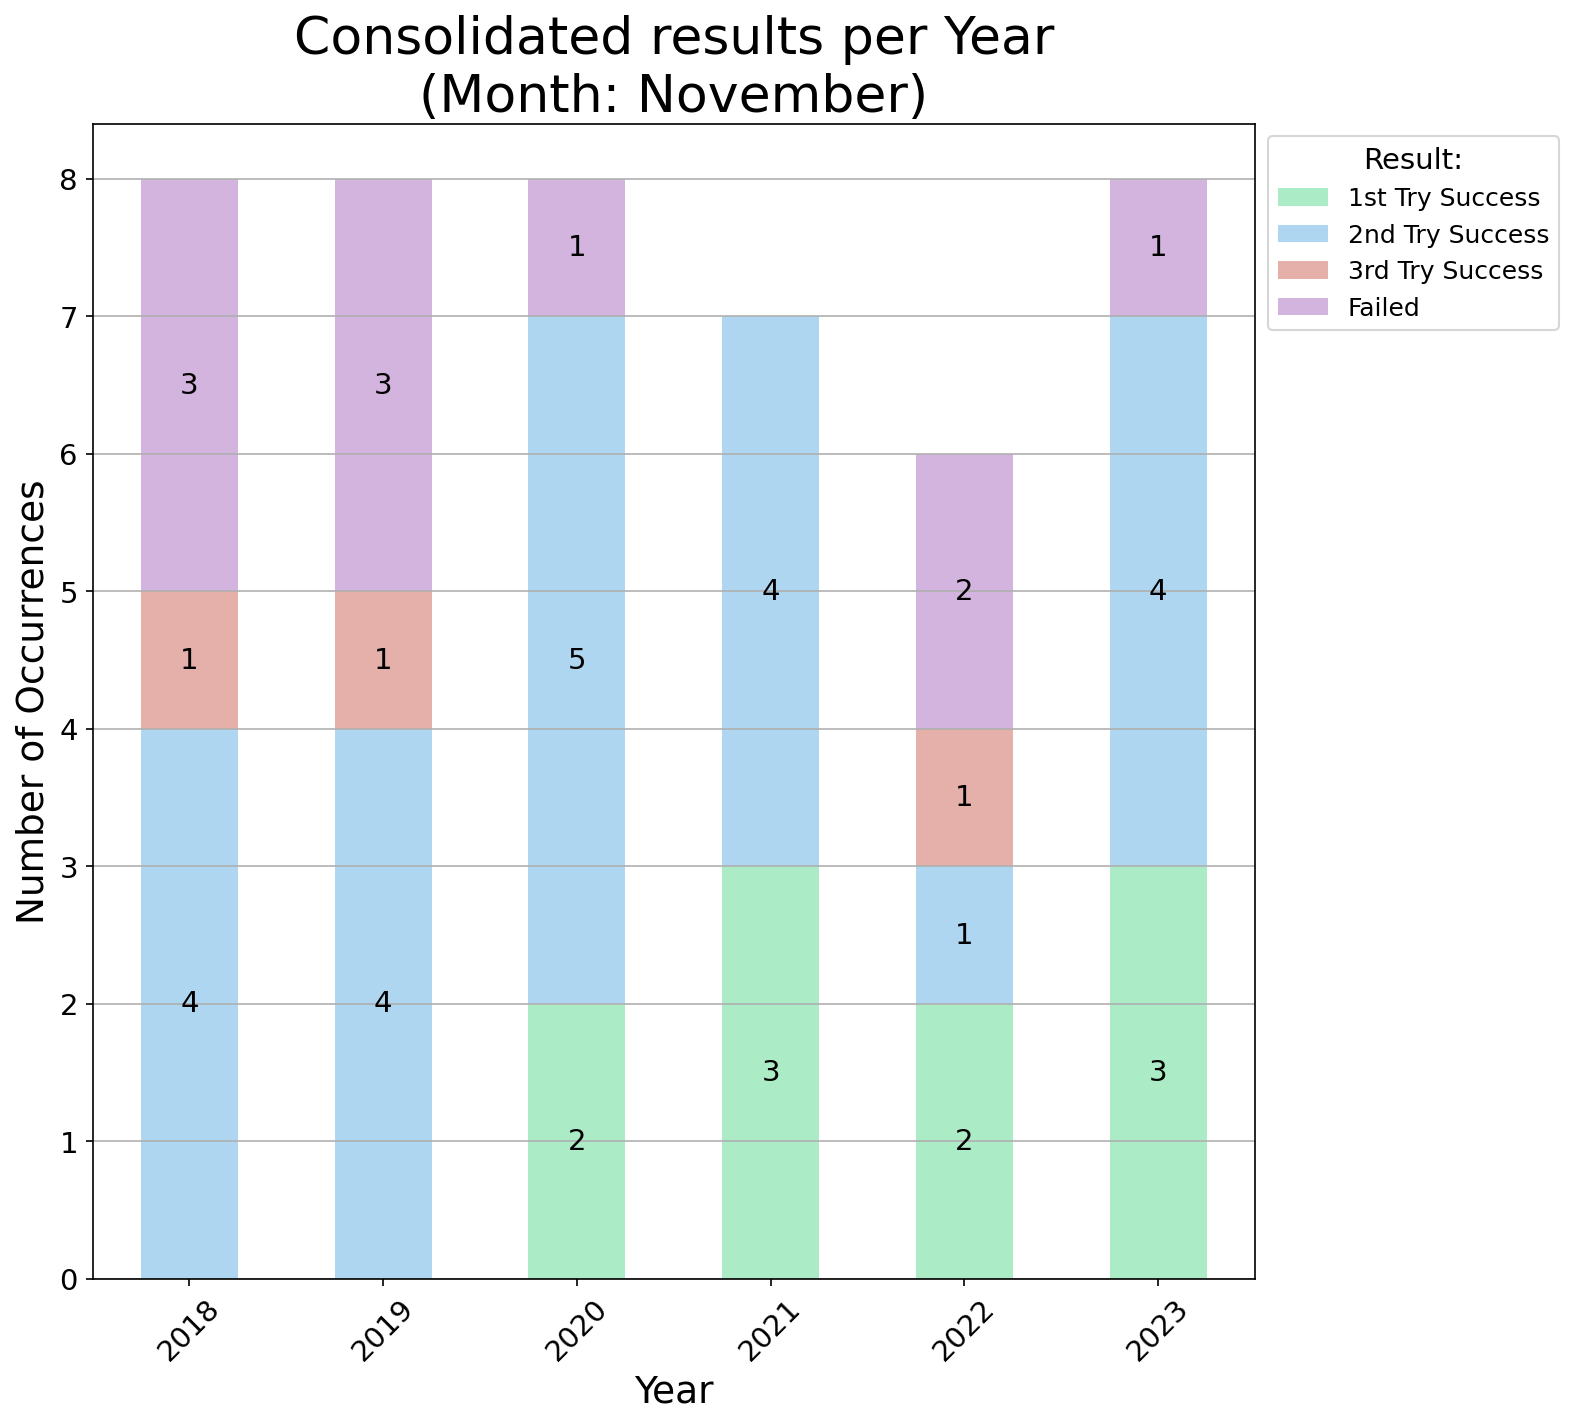

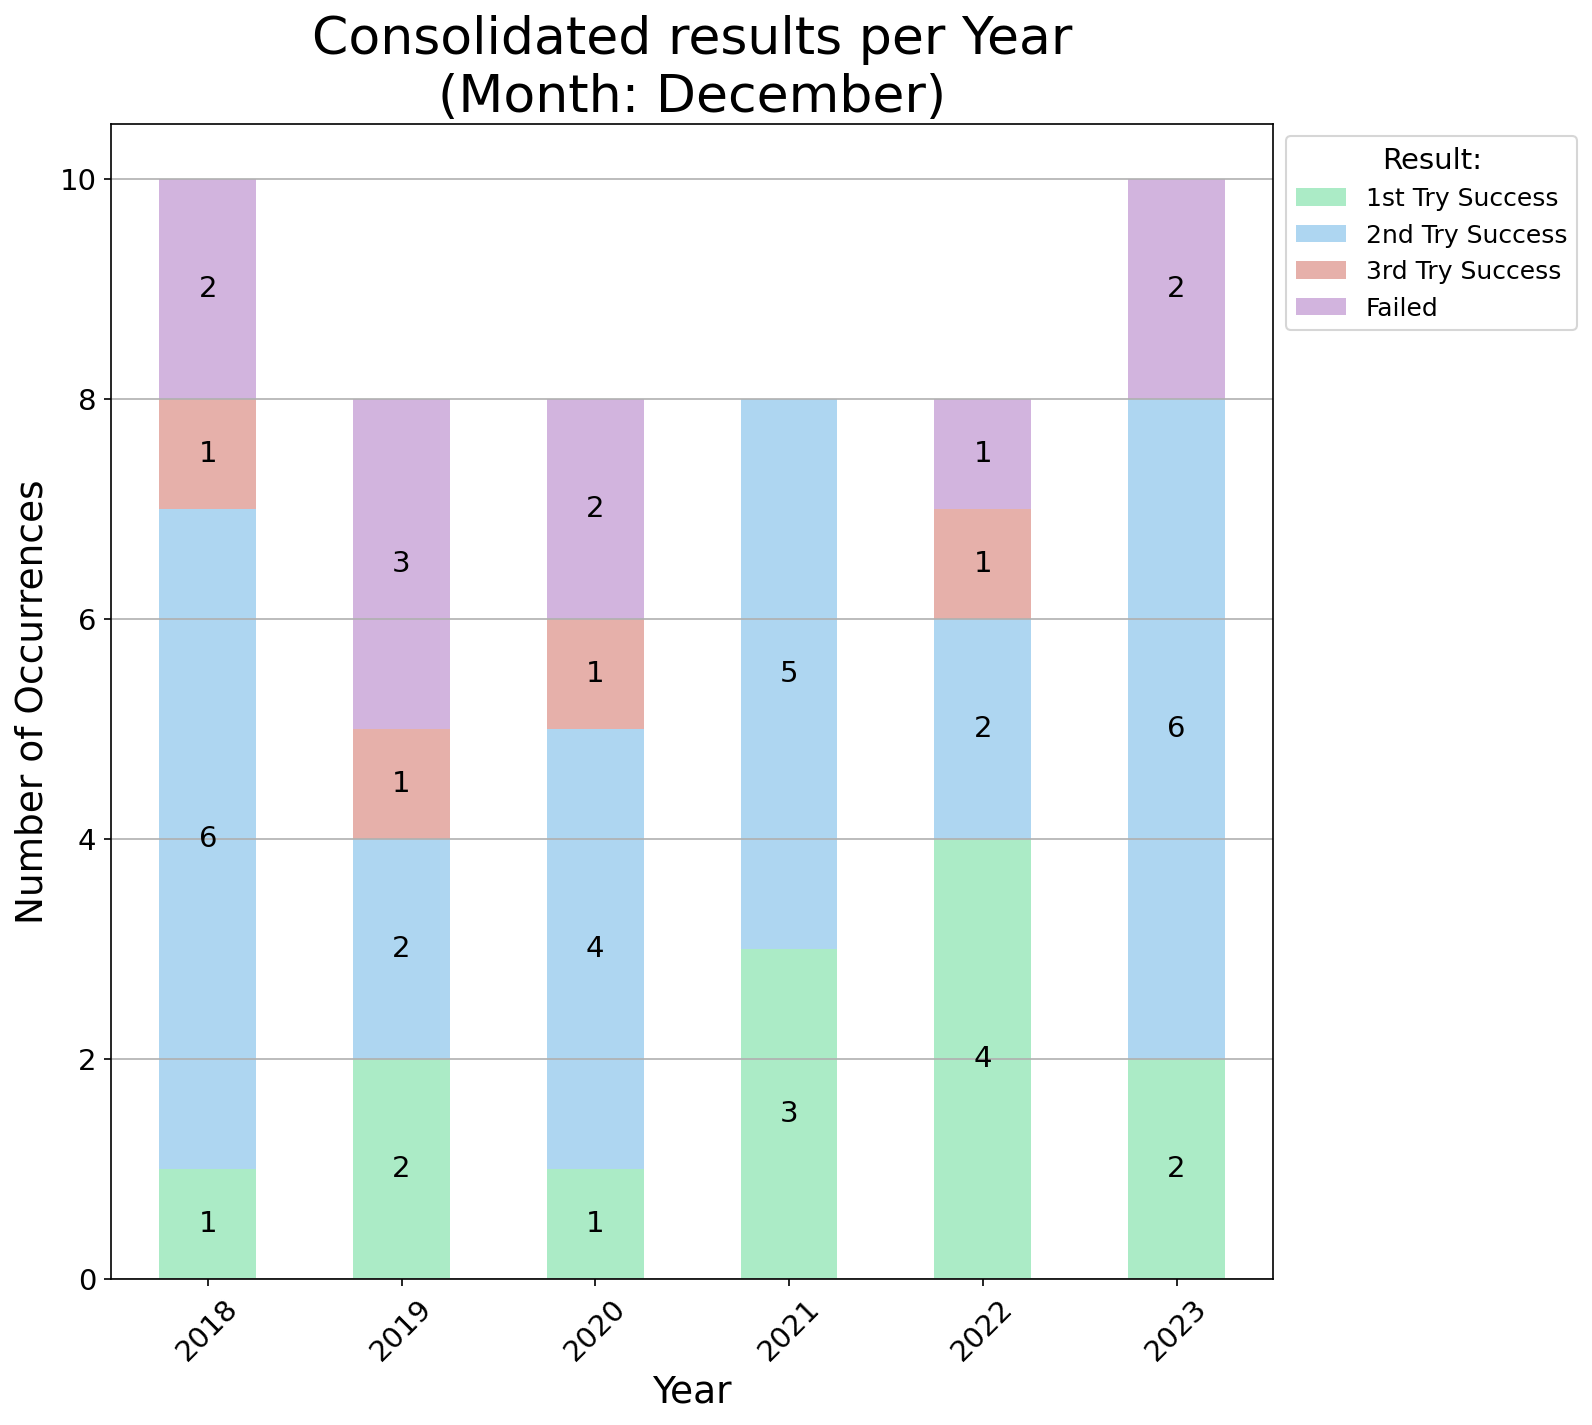

In [9]:
plot_years_per_month(df)

### My initial statement still holds true especially in the month of September wherein the whole team never got a success in their third round and end up failing.
### For now, this concludes this personal project of mine.
# Thank you.